<a href="https://colab.research.google.com/github/Amitish/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.

Get ready to unlock hidden potential! This project meticulously addresses data quality issues, transforming raw information into a powerful resource.

This project harnesses machine learning to group Netflix's vast library of 7,000+ movies and shows by content, helping users discover hidden gems and navigate the platform effortlessly.

To gain insights into the diverse content offered by Netflix, we are going to analyze the dataset containing details about movies and TV shows. We will employee descriptive statistics to understand the distribution of key variables and create visualizations like scatterplots, histograms, line charts, heatmaps etc to explore relationships between them.

This multi-faceted approach will help us uncover valuable patterns and trends within the dataset. Moreover we will identify the key anamolies and try to work upon it.

A concluding statement will not only summarize our findings but also empower audiences to derive value and fuel their own projects with these actionable insights.


# **GitHub Link -**

https://github.com/Amitish/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


Netflix welcomes new members with a personalized onboarding journey, guiding them through account setup, preference selection, and curated recommendations based on their viewing history. Walking through such a huge textual data can be impractical and resource-intensive taking in lot of time and efforts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [197]:
# Import Libraries

import numpy as np
import pandas as pd
from scipy.stats import norm

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# nltk library
import nltk
nltk.download('stopwords')  # downloads stopwords like "a","an","the"
nltk.download('punkt')      # for tokenization - breaking text into individual sentence

# downloads stopwords from nltk library if corpus is available
from nltk.corpus import stopwords

# used for matching of string ascii, punctuations, digits
import string

# Importing regex library for comparison
import re

# Method for reducing words to their base forms
from nltk.stem.porter import PorterStemmer

# More accurate than simple stemming
from nltk.stem import WordNetLemmatizer

# Import TfidfVectorizer )for counting word occurance)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Importing clustering Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Install contraction library
!pip install contractions

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Importing algorithams for building model
from sklearn.cluster import KMeans

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [198]:
# Load Dataset

from google.colab import drive                                    # Links the Google drive with Colab notebook, to extract the desired dataset
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
net = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")   # Extracting datafile

### Dataset First View

In [200]:
# Dataset First Look
net

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [201]:
# Dataset Rows & Columns count
no_of_rows = net.shape[0]
no_of_columns = net.shape[1]

print("no_of_rows: ",no_of_rows)
print("no_of_columns: ",no_of_columns)

no_of_rows:  7787
no_of_columns:  12


### Dataset Information

In [ ]:
# Dataset Info
net.info()


#### Duplicate Values

In [202]:
# Dataset Duplicate Value Count

duplicates = net.duplicated().sum()
duplicates

# 0 indicates that no duplicate rows found in entire dataset

0

#### Missing Values/Null Values

In [203]:
# Missing Values/Null Values Count

null = net.isnull().sum().reset_index()
null


,index,0
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,507
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


In [204]:
# Visualizing the missing values

nulls= pd.DataFrame({'Column Name':net.columns,'Null Values':net.isnull().sum(),'Percentage %':round(net.isnull().sum()*100/len(net),2)})
nulls.set_index('Column Name').sort_values(by='Percentage %', ascending = False)

,Null Values,Percentage %
Column Name,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


### What did you know about your dataset?

Findings by far:
1. No duplicate rows identified in the dataset.
2. **director, cast and country** column holds the most no.of nulls whereas **date_added** and **rating** column having the least.
3. **release_year** holds numeric data where all other columns are categorical.
4. As data cleaning requires replacing null values but replacing null values can sometime mislead the dataset.
5. So, it must be worked upon cautiously only were its required.

## ***2. Understanding Your Variables***

In [205]:
# Dataset Columns
net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [206]:
# Dataset Describe
net.describe()

# since release_year is the only numeric datatype column

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [207]:
categorical = [i for i in net.describe(include="object")]
print(">>>", categorical)
print(" ")
print("No.of Categorical columns: ", len(categorical))

>>> ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
 
No.of Categorical columns:  11


In [208]:
numeric = [j for j in net.columns if j not in categorical]
print(">>>", numeric)
print(" ")
print("No.of Numeric columns: ", len(numeric))

>>> ['release_year']
 
No.of Numeric columns:  1


### Variables Description

We can conclude that:
1. No.of rows x columns =  **7787 x 12**
2. No.of categorical columns = **11**
3. No.of numeric columns = **1**

### Check Unique Values for each variable.

In [209]:
# Check Unique Values for each variable.

for i in net.columns:
  d = net[i].unique()                           # unique() to get values and nunique() to get number
  print("Column ---------", i)
  print(d)
  print("No.of unique values ---------", len(d))
  print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


Column --------- show_id
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
No.of unique values --------- 7787
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Column --------- type
['TV Show' 'Movie']
No.of unique values --------- 2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Column --------- title
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
No.of unique values --------- 7787
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Column --------- director
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
No.of unique values --------- 4050
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Column --------- cast
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [210]:
# Write your code to make your dataset analysis ready.

net.fillna({"director": "unknown", "cast": "unknown", "country": "unknown"}, inplace=True)

net.dropna(subset=["date_added", "rating"], inplace=True)

# Converting the data types of features date_added and release_year to the appropriate data types
net['date_added'] = net['date_added'].str.strip()
net['date_added'] = pd.to_datetime(net['date_added'], format='%B %d, %Y', errors='coerce')
net.release_year = net.release_year.astype('int64')

# Renaming name of column listed_in to genre
net.rename = net.rename(columns={'listed_in':'genre'}, inplace=True)

# Breaking down the date_added column based on dd/mm/yy
net['year_added']= net['date_added'].dt.year
net['month_added']= net['date_added'].dt.month
net['day_added']= net['date_added'].dt.day

# Deleting column date_added
net.drop("date_added", axis=1, inplace=True)

#convert int32 into int64
net['year_added'] = net['year_added'].astype(np.int64)
net['month_added']= net['month_added'].astype(np.int64)
net['day_added']= net['day_added'].astype(np.int64)

# Partitioning and creating new dataset based on type of show
tv_shows_data = net[net["type"]=='TV Show']
movie_shows_data = net[net["type"]=='Movie']

In [211]:
net.isnull().sum().reset_index()

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,release_year,0
7,rating,0
8,duration,0
9,genre,0


### What all manipulations have you done and insights you found?

1. Then we performed **isnull()** to find null values and concluded that we have **5** columns with some null values.
2. We initiated **drop_duplicates()** method but didn't find any duplicate values in the dataset.
3. The 2 coulmns i.e., **date_added** and **rating** had very less number of null values, so we removed those null values.
4. The 3 columns i.e., **director, cast** and **country** had huge number of null values so dropping these columns couldn't be afforded hence we replaced null values with **"unknown"**.
5. Converted the data types of features date_added and release_year to the appropriate data types.
6. Renamed name of column **listed_in** to **genre**.
7. Broke down the **date_added** column based on **dd/mm/yy** and deleted the previous column.
8. We now have **14 rows** instead of 12.
9. Partitioned and creating new dataset based on type of show.

.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

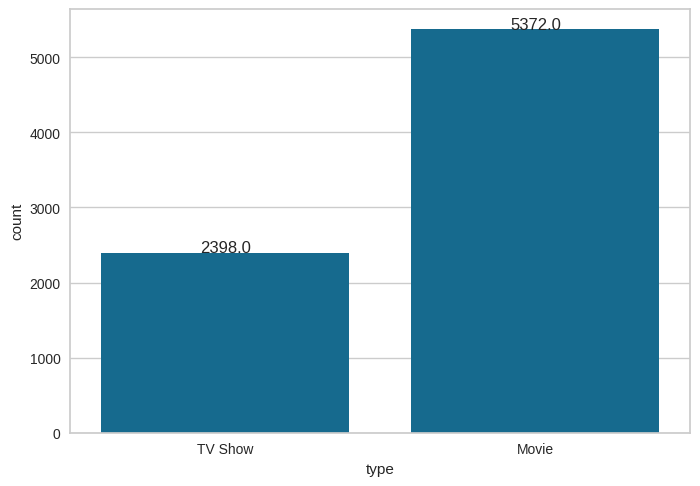

In [212]:
ax = sns.countplot(x=net["type"])

for p in ax.patches:
    count = p.get_height()  # Get the count for each bar
    x = p.get_x() + p.get_width() / 2  # Get the center x-coordinate of each bar
    y = count
    ax.annotate(f"{count}", (x, y), ha='center')


##### 1. Why did you pick the specific chart?

- The chart reflects the count of show type that is available. This gives a kind of understanding as to which show is most displayed and hence helps the user in making the right decision before watching.


##### 2. What is/are the insight(s) found from the chart?

The bar chart gives a count of Show Type:
- Movie : **5372**
- TV Show : **2398**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can drive insite from the chart above that **Movie** is the most displayed/watched show type. This will eventually give users an idea about the popularity of show type  and hence assist them in making right choice.

- The insite will definitely not just benefit users in their decision making process but in turn will also benefit directors to know about the users interest.

#### Chart - 2

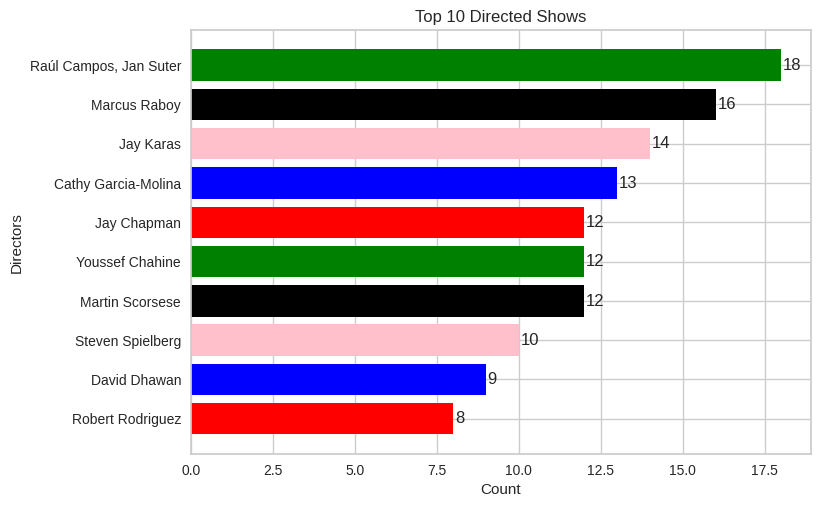

In [213]:
# Chart - 2 visualization code

shows_produced = net["director"].value_counts()

# Filter out "unknown" values, keeping remaining top 10
shows_produced = shows_produced.loc[shows_produced.index != "unknown"].head(10).sort_values(ascending=True)

colors = ["red", "blue", "pink", "black", "green"]

plt.barh(shows_produced.index, shows_produced.values, color=colors)

for i, v in enumerate(shows_produced.values):
    plt.text(v + 0.05, i, str(v), va="center")

plt.title("Top 10 Directed Shows")
plt.xlabel("Count")
plt.ylabel("Directors")
plt.show()


##### 1. Why did you pick the specific chart?

- The reason of selecting this chart is to get an overview of top 10 Directors  with most number of shows count.



##### 2. What is/are the insight(s) found from the chart?

- We can state that:
1. **Raul Campos, Jan Suter** has directed most no.of shows i.e, **18** amongst top 10.
2. **Robert Rodriguez** has directed **8** shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes indeed the gained insights will help in creating positive business impact as it portrays an understanding of maximum shows directed by a Director. Based on the experience right director can be approached.

- As such no negative growth can be fetched from above dataset.

#### Chart - 3

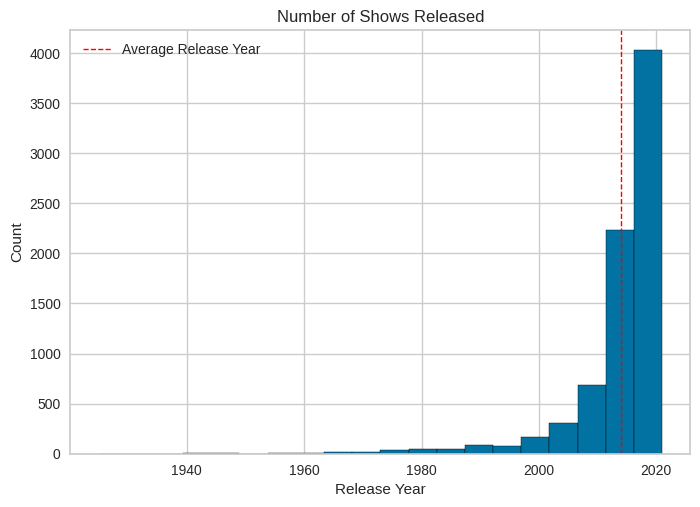

In [214]:
# Chart - 3 visualization code

avg_year = net["release_year"].mean()

plt.hist(net["release_year"], bins=20, edgecolor="black")

plt.axvline(x=avg_year, color="red", linestyle="dashed", linewidth=1, label="Average Release Year")

plt.title("Number of Shows Released")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

- Selecting the above chart conveys a visual of how shows have been released in an interval of time on an average.

##### 2. What is/are the insight(s) found from the chart?

- Following information can be driven out:
1. Release of shows has seen an **incremental** growth with time.
2. **Average** no.of shows releases are in the year **2013**.
3. **Maximum** no.of shows releases are in the year **2021**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The above insight will to some extend help in gaining positive business impact as we can proclaim with every increasing year the no.of shows release is increasing.
- As of we can't see any negative growth from the data above as all the figure that we have seems to be upto the mark, adding some positivity to the data.

#### Chart - 4

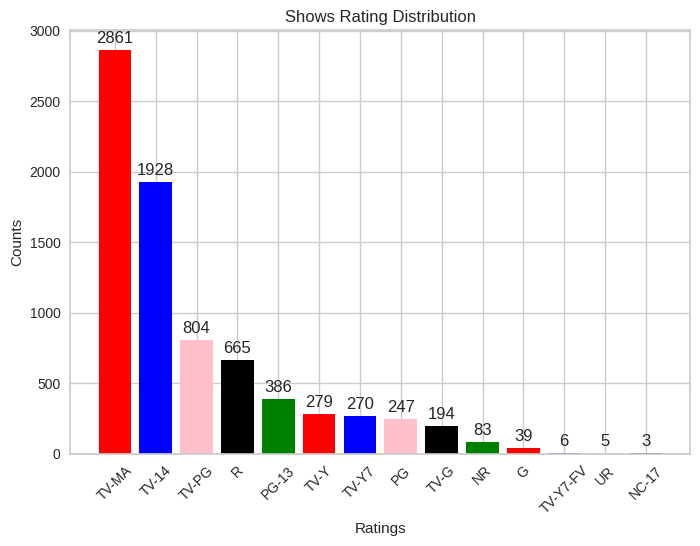

In [215]:
# Chart - 4 visualization code

ratings = net["rating"].value_counts()

colors = ["red", "blue", "pink", "black", "green"]
plt.bar(ratings.index, ratings.values, color=colors)

# Add count labels above each bar
for i, v in enumerate(ratings.values):
    plt.text(i, v + 50, str(v), ha="center")

# Customize the chart
plt.title("Shows Rating Distribution")
plt.xlabel("Ratings")
plt.xticks(rotation=45)
plt.ylabel("Counts")
plt.show()


##### 1. Why did you pick the specific chart?

- The logic of driving bar chart is to conceive the insight of ratings count being majorly provided.

##### 2. What is/are the insight(s) found from the chart?

- The above graph states that:
1. **TV-MA** is the **highest** rating in the list with count of **2861**.
2. **NC-17** is almost the **least** rating in the list with count of **3**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In short we can for sure say that the above analysis will lay a positive impact on business, as they will get a clear picture of ratings count.
- One negative point is that lesser the rating lesser is the popularity of the show.

#### Chart - 5

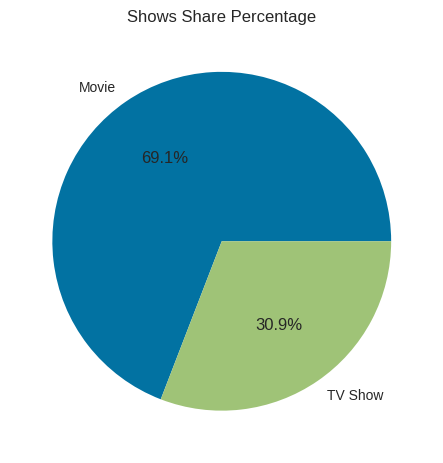

In [216]:
# Chart - 5 visualization code

shows_share = net["type"].value_counts()

plt.pie(shows_share.values, autopct='%1.1f%%', labels=shows_share.index)

plt.title("Shows Share Percentage")

plt.show()

##### 1. Why did you pick the specific chart?

- The motive of selecting this specific chart is to get a clear picture of show type distribyution.

##### 2. What is/are the insight(s) found from the chart?

- From the above chart we can say that:
1. **Movie** show type constitutes for **69.1%** overall.
2. **TV** Show constitutes for **30.9%**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes the gained insight will surely create a positive business impact as user will get to know the weightage shared by each show type.
- Moreover directors will also have a better understanding of the public demand.

#### Chart - 6

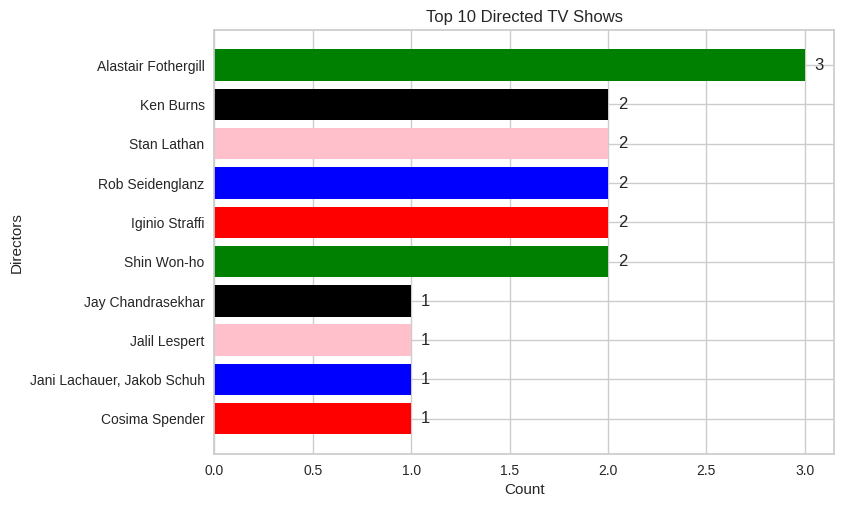

In [217]:
# Chart - 6 visualization code

shows_prod = tv_shows_data["director"].value_counts()

# Filter out "unknown" values, keeping remaining top 10
shows_prod = shows_prod.loc[shows_prod.index != "unknown"].head(10).sort_values(ascending=True)

colors = ["red", "blue", "pink", "black", "green"]

plt.barh(shows_prod.index, shows_prod.values, color=colors)

for i, v in enumerate(shows_prod.values):
    plt.text(v + 0.05, i, str(v), va="center")

plt.title("Top 10 Directed TV Shows")
plt.xlabel("Count")
plt.ylabel("Directors")
plt.show()


##### 1. Why did you pick the specific chart?

- The label graph reflects distribution of Top 10 TV shows directed by Directors.

##### 2. What is/are the insight(s) found from the chart?

- We can state following conclusion:
1. **Alastair** has directed **3** TV shows amongst top 10.
2. There are many director with 2 or less no.of TV shows directed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- More no.of TV shows directed gives an idea about how experienced the director is a particular TV show type.
- The data doesnt interpret any negative growth as such.

#### Chart - 7

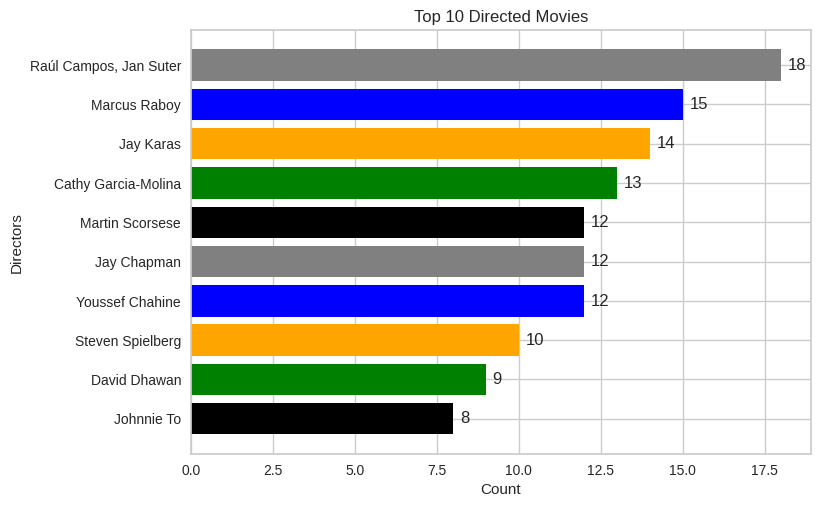

In [218]:
# Chart - 7 visualization code

mov_prod = movie_shows_data["director"].value_counts()

# Filter out "unknown" values, keeping remaining top 10
mov_prod = mov_prod.loc[mov_prod.index != "unknown"].head(10).sort_values(ascending=True)

colors = ["black", "green", "orange", "blue", "grey"]

plt.barh(mov_prod.index, mov_prod.values, color=colors)

for i, v in enumerate(mov_prod.values):
    plt.text(v + 0.2, i, str(v), va="center")

plt.title("Top 10 Directed Movies")
plt.xlabel("Count")
plt.ylabel("Directors")
plt.show()


##### 1. Why did you pick the specific chart?

- The label graph potrays distribution of Top 10 TV movies directed by respective directors.


##### 2. What is/are the insight(s) found from the chart?

1. **Raul** and **Jan** has directed most no.of movies i.e., **18** each.
2. **Johnnie** has directed **8** movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The number of films directed by a director can give some indication of their experience in a particular movie type.
- By far we don't find any insights that lead to negative growth.

#### Chart - 8

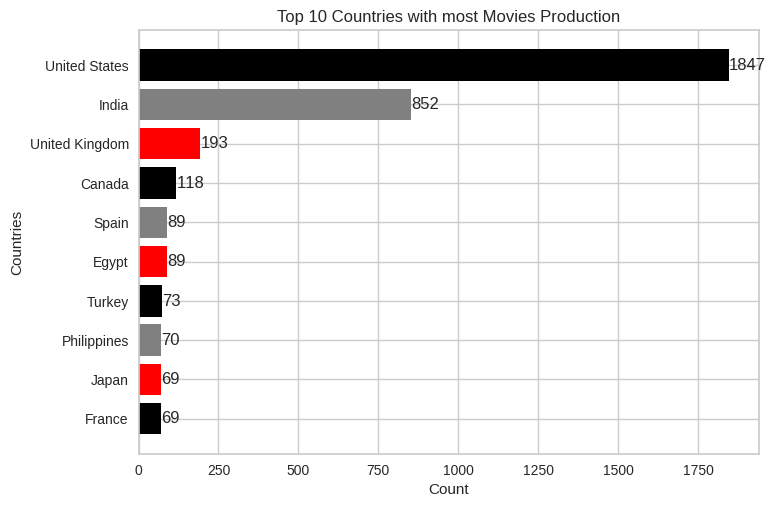

In [219]:
# Chart - 8 visualization code

mov_con = movie_shows_data["country"].value_counts()

# Filter out "unknown" values, keeping remaining top 10
mov_con = mov_con.loc[mov_con.index != "unknown"].head(10).sort_values(ascending=True)

colors = ["black", "red", "grey"]

plt.barh(mov_con.index, mov_con.values, color=colors)

for i, v in enumerate(mov_con.values):
    plt.text(v + 0.2, i, str(v), va="center")

plt.title("Top 10 Countries with most Movies Production")
plt.xlabel("Count")
plt.ylabel("Countries")
plt.show()


##### 1. Why did you pick the specific chart?

- This visualization highlights the movie with the highest production count.

##### 2. What is/are the insight(s) found from the chart?

- We can conclude that:
1. Most no.of movies production Country is **United States** with count **1847**.
2. **India** is the **2nd** largest movie producing Country with count **852**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The stats clearly shows that United States is the highest movie producing country which reflects its the first choice for every director.
- Apart from United States and India other countries need to work on production capacity.

#### Chart - 9

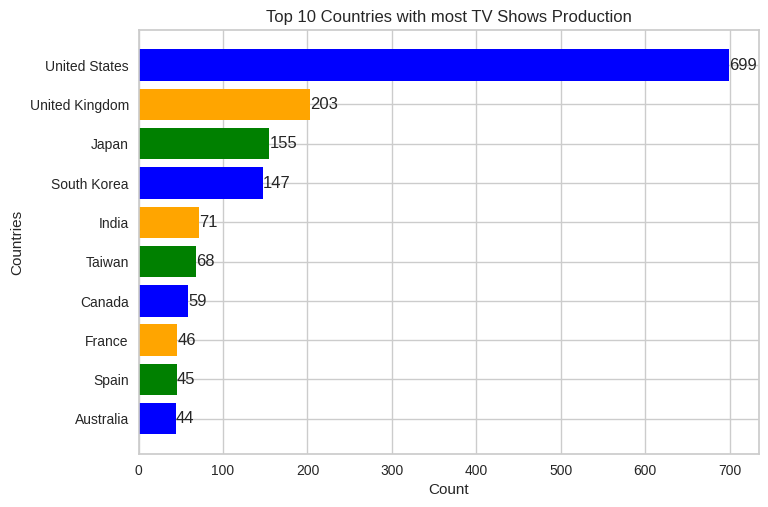

In [220]:
# Chart - 9 visualization code

tv_show_con = tv_shows_data["country"].value_counts()

# Filter out "unknown" values, keeping remaining top 10
tv_show_con = tv_show_con.loc[tv_show_con.index != "unknown"].head(10).sort_values(ascending=True)

colors = ["blue", "green", "orange"]

plt.barh(tv_show_con.index, tv_show_con.values, color=colors)

for i, v in enumerate(tv_show_con.values):
    plt.text(v + 0.2, i, str(v), va="center")

plt.title("Top 10 Countries with most TV Shows Production")
plt.xlabel("Count")
plt.ylabel("Countries")
plt.show()


##### 1. Why did you pick the specific chart?

- This graph pinpoints the countries TV shows with the highest number involved in its production.

##### 2. What is/are the insight(s) found from the chart?

We can deduce following conclusion:
1. **United States** is the highest TV show producing country with count of **699**.
2. **United Kingdom** is **2nd** highest TV show producing country with count of **203**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Statistics reveal that the United States leads the world in TV Show  production, suggesting it may be a preferred destination for many directors.
- Except United States all other countries have shown a pretty small no.of production capacity.

#### Chart - 10

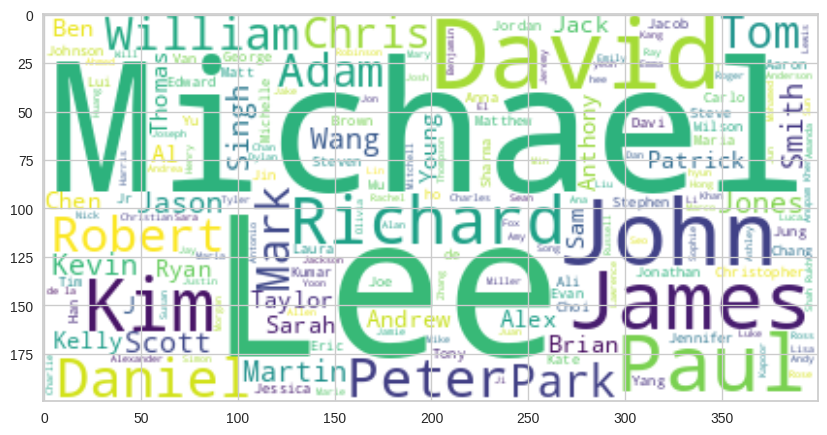

In [221]:
# Chart - 10 visualization code

from wordcloud import WordCloud
plt.subplots(figsize=(10,8))

casting = net[net['cast'] != 'unknown']

wordcloud = WordCloud(background_color='white').generate(','.join(casting.cast))

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


##### 1. Why did you pick the specific chart?

- The word cloud gives a visual glimpse of which actor/actress has performed in most no.of shows.

##### 2. What is/are the insight(s) found from the chart?

- We can deduce following information from above visuals:
1. The word with bigger text size depicts that those casts has been casted most no.of movies like Michael, Lee etc.
2. The ones with smaller text size depicts that those casts has been casted in less no.of movies  like Tim, Yu etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes surely the insight will help directors to make the right decision while casting the actor/actress based on their experience.
- No negative insight can be predicted from the above visual.

#### Chart - 11

Text(0.5, 1.0, 'Movies vs TV_shows Release Year Analysis')

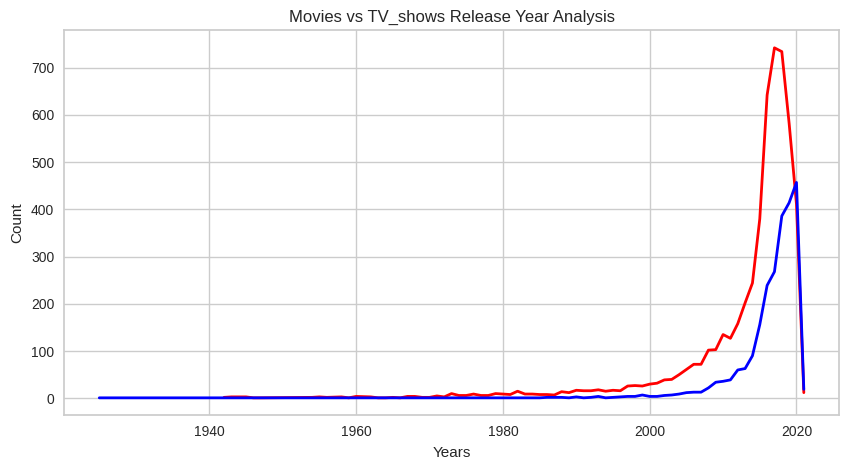

In [222]:
# Chart - 11 visualization code

tv_shows_yr = tv_shows_data['release_year'].value_counts().sort_index(ascending=False)
movie_shows_yr = movie_shows_data['release_year'].value_counts().sort_index(ascending=False)

movie_shows_yr.plot(figsize=(10, 5), linewidth=2, color='red')
tv_shows_yr.plot(figsize=(10, 5), linewidth=2, color='blue')
plt.xlabel("Years", labelpad=5)
plt.ylabel("Count", labelpad=5)
plt.title("Movies vs TV_shows Release Year Analysis")


##### 1. Why did you pick the specific chart?

- The line chart shows time trend analysis of movies vs TV shows release year.

##### 2. What is/are the insight(s) found from the chart?

- It is clear from above graph that:
1. Both TV shows and movie release year has seen an incremental growth over years.
2. 2020-2021 has seen maximum releases for both type of shows.





.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Definitely the above states delivers a positive buiness impact by providing a clear picture of shows release year.
- Release year for both type of TV shows has seen an incremental groth over years so no negative growth can be stated.

#### Chart - 12

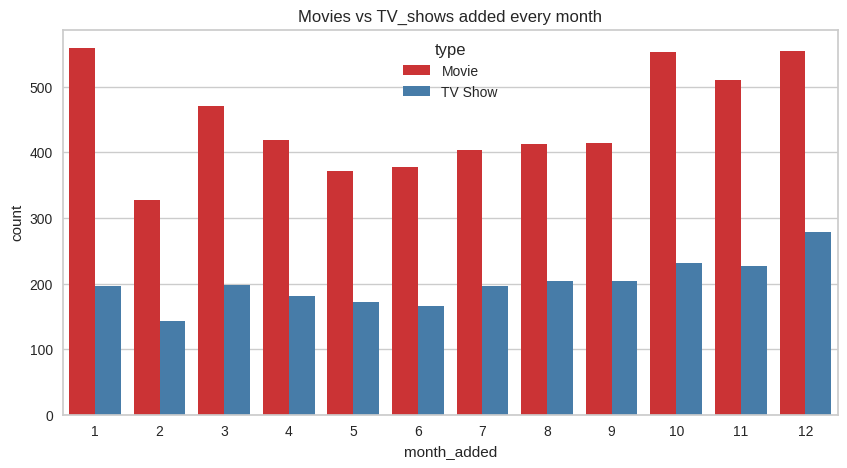

In [223]:
# Chart - 12 visualization code

fig, ax = plt.subplots(figsize=(10, 5))

palette = sns.color_palette("Set1")
sns.countplot(x="month_added", hue="type", lw=2, data=net, palette=palette)

plt.title("Movies vs TV_shows added every month")
plt.show()


##### 1. Why did you pick the specific chart?

- The bar chart above give a pictorial representation of how shows are added month on month.

##### 2. What is/are the insight(s) found from the chart?

- We can state from above information that:
1. Movie show type has shown more no.of month on month addition as compared to TV show type.
2. Both show type has seem a fluctuating trend in addition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can signify from above stats that though for both the show types month on month addition is not stable, it shows fluctuating result but movie show type has seen more additions.
- The only near to negative fact about the stats is that TV show type has seen lesser growth as compared to movie show type.


#### Chart - 13

<Axes: title={'center': 'Top 10 Genre of Shows Type'}, xlabel='count', ylabel='genre'>

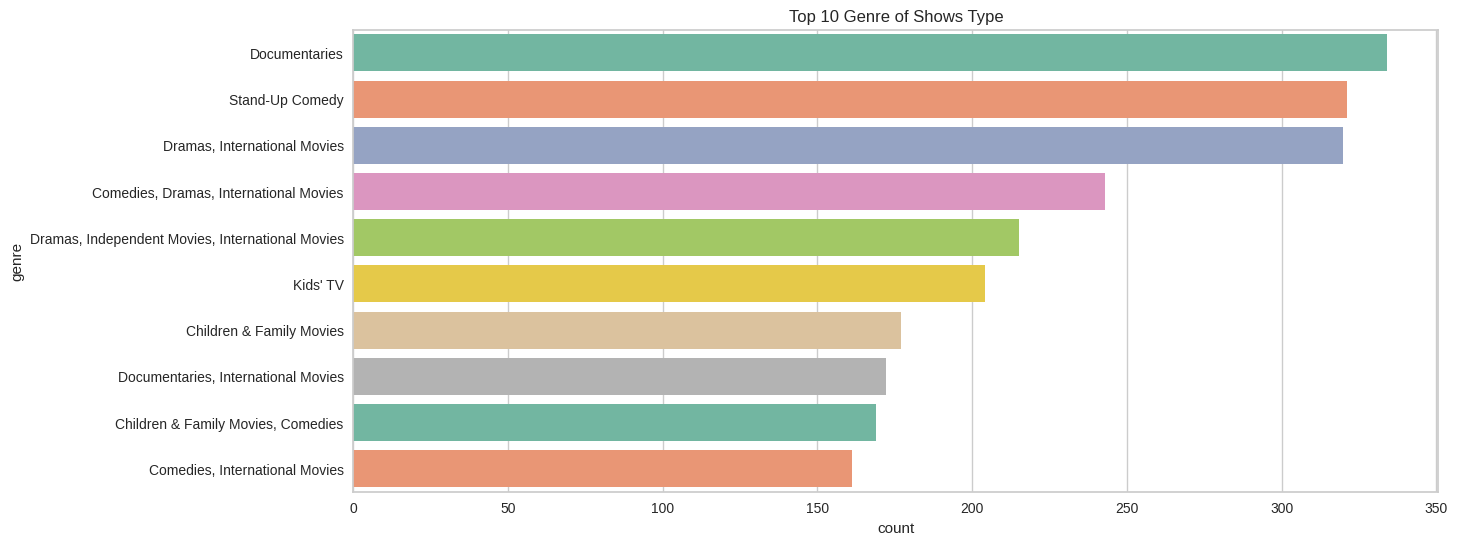

In [224]:
# Chart - 13 visualization code

plt.figure(figsize=(14,6))
plt.title('Top 10 Genre of Shows Type')
palette = sns.color_palette("Set2")
sns.countplot(y=net['genre'], data=net, order=net['genre'].value_counts().index[0:10], palette=palette)


##### 1. Why did you pick the specific chart?

- The label chart shows how choice of genre is prferred amongst directors.

##### 2. What is/are the insight(s) found from the chart?

- The above figure states that:
1. Documenatries is the best choice of directors amongst all genre type.
2. There is a close call between stand up comedy and dramas genre type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The gained insight will for sure help creating a positive businesss impact from directors point of view as they can focus on the genre which is mostly preferred.
- As far no negative insight can be deduced from the above states.

#### Chart - 14 - Correlation Heatmap

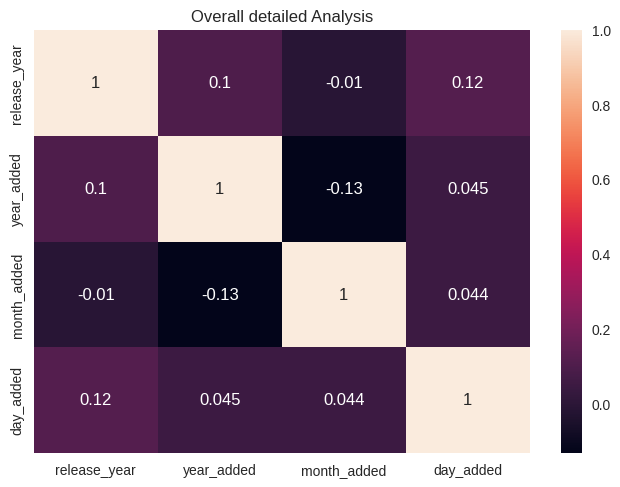

In [225]:
# Correlation Heatmap visualization code

sns.heatmap(data=net[["release_year","year_added","month_added", "day_added"]].corr(), annot= True)

plt.title("Overall detailed Analysis")

plt.show()


##### 1. Why did you pick the specific chart?

- The selection of heatmap chart is to give a clear insight of how each and every series in the data set are linked to each other, how collaborative the bonds are and how loose are they.

##### 2. What is/are the insight(s) found from the chart?

- We can say from above observation that:
1. The one's with lightest color and indicated with numeric value 1 shares the strongest bond i.e., the series when compared with itself serves the deep collaboration.
2. As the color keeps darkening, the strength of the bonds keeps on deteriorating and the numeric values justifies it all.
3. The series who's joint venture depicts the darkest color and have least numeric value claims to have the weakest bond.

#### Chart - 15 - Pair Plot

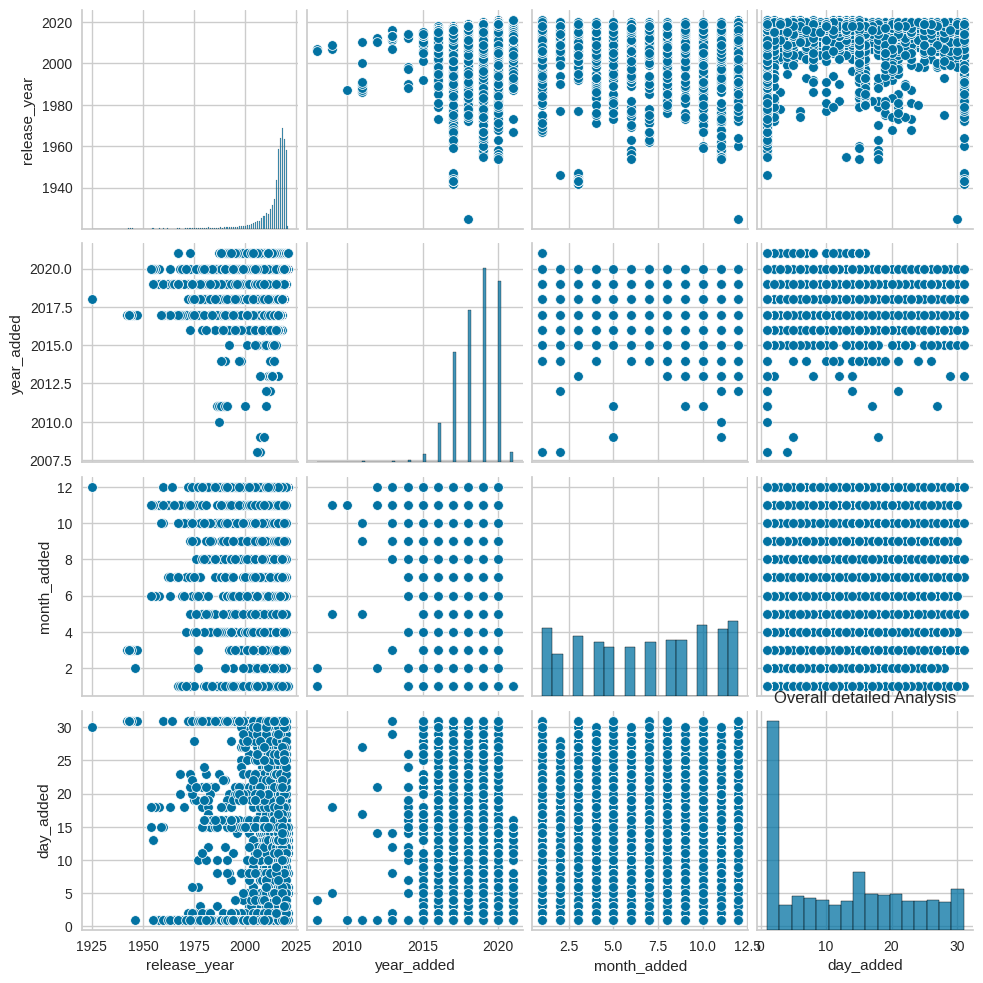

In [226]:
# Pair Plot visualization code

sns.pairplot(net)

plt.title("Overall detailed Analysis")

plt.show()

##### 1. Why did you pick the specific chart?

- The motive of selecting pair plot is to get a summarized insight of relationship shared between different type of columns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- Following analysis can be drawn from the above data:
1. Out of all the columns we have extracted out the ones which are are numeric in nature and add some meaningful data to the analysis.
2. The relationship charts give clear highlights of how each column in the dataset shares a relation with another.
3. The peaks in the chart signifies a strong relation when a specified column intersects with itself.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. **Hypothetical Statement 1:** Viewer Rating and Mature Content
2. **Hypothetical Statement 2:** Release Year Impact on Show Volume
3. **Hypothetical Statement 3:** Genre of Movies

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Hypothesis:** The number of shows released on Netflix has significantly increased **after 2010** compared to **before 2010**.

- **Null Hypothesis (Ho)**: The number of shows released **before 2010** is the same as or more than the number released after 2010.
- **Alternative Hypothesis (Ha)**: The number of shows released **after 2010** is more than the number released before 2010

In [227]:
# Shows released after 2010
net_after_2010 = net[net["year_added"]>2010]
print("Shows_released_after_2010: ", net_after_2010.shape[0])

Shows_released_after_2010:  7765


In [228]:
# Shows released before 2010
net_before_2010 = net[net["year_added"]<=2010]
print("Shows_released_before_2010: ", net_before_2010.shape[0])

Shows_released_before_2010:  5


In [229]:
mean1 = net_after_2010["year_added"].mean()
print("mean_net_after_2010: ", round(mean1,0))
mean2 = net_before_2010["year_added"].mean()
print("mean_net_before_2010: ", round(mean2,0))
overall_mean = net["year_added"].mean()
print("mean_overall: ",  round(overall_mean,0))

mean_net_after_2010:  2019.0
mean_net_before_2010:  2009.0
mean_overall:  2018.0


#### 2. Perform an appropriate statistical test.

In [230]:
# Perform Statistical Test to obtain P-Value

# We will perform Z Test Statistics

from statsmodels.stats.proportion import proportions_ztest

ts= net.shape[0]

try:
    count = np.array([net_after_2010, net_before_2010])
    print("Array:", count)
except ValueError as e:
    print("Error:", e)

nobs = np.array([ts, ts])  # Total observations

stat, pval = proportions_ztest(count, nobs, alternative='larger')

print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print('p-value:', pval)


Error: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
p-value: 0.5


##### Which statistical test have you done to obtain P-Value?

- He have choosen **Z Test** to determine the **p value** for the above hypothesis.
- The **p value** for the above scenerio rolls out to be **0.5**.
- **p value 0.5** clearly stats that its **too high** and falls under **type II error**.
- Moreover from above observation its visible that **population mean** is close to **Ha hypothesis**.
- Hence we conclude that based on the result, we will **reject the Ho hypothesis**.

##### Why did you choose the specific statistical test?

- **Z-score hypothesis** testing could indeed be suited for **analyzing the impact** of a specific year (2010) on the volume of shows released on Netflix, as outlined in your previous scenario about whether there has been a significant increase in the number of shows released after 2010 compared to before.
- The **Z-test** is generally **preferred** when the sample size is large (**typically n > 30**).
- In hypothesis testing, converting the **difference between** the **sample mean** and the **population mean** into a Z-score allows for easy comparison against standard normal distribution values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Hypothesis:** Shows classified as "**TV-MA**" (Mature Audience) have a **higher** average viewer rating than shows classified as "**TV-PG**" (Parental Guidance).

- **Null Hypothesis (Ho)**: Mean viewer rating for **TV-MA** shows **equals** the mean viewer rating for **TV-PG** shows
- **Alternative Hypothesis (Ha)**: Mean viewer rating for **TV-MA** shows is **greater than** the mean viewer rating for **TV-PG** shows.

In [231]:
# rating count for TV_MA
net_rating_TV_MA = net[net["rating"] == "TV-MA"]
print("net_rating_TV_MA: ", net_rating_TV_MA.shape[0])

net_rating_TV_MA:  2861


In [234]:
# rating count for TV_PG
net_rating_TV_PG = net[net["rating"] == "TV-PG"]
print("net_rating_TV_PG: ", net_rating_TV_PG.shape[0])

net_rating_TV_PG:  804


In [233]:
net_mean_rating_TV_MA = 2861/net.shape[0]
print("net_mean_rating_TV_MA: ", round(net_mean_rating_TV_MA, 2))
net_mean_rating_TV_PG = 804/net.shape[0]
print("net_mean_rating_TV_PG: ", round(net_mean_rating_TV_PG,2))
mean2 = (2861+804)/net.shape[0]
print("Overall_mean: ", round(mean2,2))

net_mean_rating_TV_MA:  0.37
net_mean_rating_TV_PG:  0.1
Overall_mean:  0.47


#### 2. Perform an appropriate statistical test.

In [235]:
# Perform Statistical Test to obtain P-Value

# We will perform Z Test Statistics

from statsmodels.stats.proportion import proportions_ztest

ts= net.shape[0]

try:
    count = np.array([net_rating_TV_MA, net_rating_TV_PG])
    print("Array:", count)
except ValueError as e:
    print("Error:", e)

nobs2 = np.array([ts, ts])  # Total observations

stat2, pval2 = proportions_ztest(count, nobs, alternative='larger')

print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print('p-value:', pval2)


Error: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
p-value: 0.5


##### Which statistical test have you done to obtain P-Value?

- He have choosen **Z Test** to calculate the **p value** for the above testing.  
- **p value 0.5** points out to be **too high** and falls under **type II error**.
- Moreover from above observation its visible that **population mean** is close to **Ha hypothesis**.
- Hence we conclude that based on the result, we will **reject the Ho hypothesis**.

##### Why did you choose the specific statistical test?

- **Z-score hypothesis** testing could indeed be suited for **analyzing the rating count** of specifically 2 types of rating i.e., "**TV-MA**" (Mature Audience) and "**TV-PG**" (Parental Guidance).
- The **Z-test** is generally **preferred** when the sample size is large (**typically n > 30**).
- In hypothesis testing, converting the **difference between** the **sample mean** and the **population mean** into a Z-score allows for easy comparison against standard normal distribution values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Hypothesis:** The average count of movies labeled as "**Dramas**" is less than the average count of movies labeled as "**Comedies**."

- **Null Hypothesis (Ho)**: The average count of **Dramas** is the **same** more than **Comedies**.
- **Alternative Hypothesis (Ha)**: The average count of **Dramas** is same or less than **Comedies**.

In [236]:
# Before performing any hypothesis testing we will first explode the genre column and seggregate all the genres seperately

net2= net.copy()
net2["genre"] = net2["genre"].str.split(",")
net2 = net2.explode('genre')
net2["genre"] = net2["genre"].apply(lambda x: x.strip())
net2["genre"]

0       International TV Shows
0                    TV Dramas
0          TV Sci-Fi & Fantasy
1                       Dramas
1         International Movies
                 ...          
7784          Music & Musicals
7785    International TV Shows
7785                Reality TV
7786             Documentaries
7786          Music & Musicals
Name: genre, Length: 17042, dtype: object

In [238]:
net_2 = pd.DataFrame(net2)

In [240]:
# Count for genre Dramas
net_2_genre_dramas = net_2[net_2["genre"] == "Dramas"]
print("net_2_genre_dramas: ", net_2_genre_dramas.shape[0])

net_2_genre_dramas:  2105


In [241]:
# Count for genre Comedies
net_2_genre_comedy = net_2[net_2["genre"] == "Comedies"]
print("net_2_genre_comedy: ", net_2_genre_comedy.shape[0])

net_2_genre_comedy:  1471


In [242]:
net_mean_dramas = 2105/net.shape[0]
print("net_mean_dramas: ", round(net_mean_dramas, 2))
net_mean_comedy = 1471/net.shape[0]
print("net_mean_comedy: ", round(net_mean_comedy,2))
mean2 = (2105+1471)/net.shape[0]
print("Overall_mean: ", round(mean2,2))

net_mean_dramas:  0.27
net_mean_comedy:  0.19
Overall_mean:  0.46


#### 2. Perform an appropriate statistical test.

In [243]:
# Perform Statistical Test to obtain P-Value
# We will perform Z Test Statistics

from statsmodels.stats.proportion import proportions_ztest

ts= net.shape[0]

try:
    count = np.array([net_2_genre_comedy, net_2_genre_dramas])
    print("Array:", count)
except ValueError as e:
    print("Error:", e)

nobs3 = np.array([ts, ts])  # Total observations

stat3, pval3 = proportions_ztest(count, nobs, alternative='larger')

print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print('p-value:', pval3)


Error: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
p-value: 0.5


##### Which statistical test have you done to obtain P-Value?

- He have choosen **Z Test** to determine the **p value** for the above hypothesis.
- The **p value** for the above scenerio rolls out to be **0.5**.
- **p value 0.5** clearly stats that its **too high** and falls under **type II error**.
- Moreover from above observation its visible that **population mean** is close to **Ho hypothesis**.
- Hence we conclude that based on the result, we will **fail to reject the Ho hypothesis**.

##### Why did you choose the specific statistical test?

- **Z-score hypothesis** testing could indeed be suited for **analyzing the count** of specific genre like comedies and dramas.
- The **Z-test** is generally **preferred** when the sample size is large (**typically n > 30**).
- In hypothesis testing, converting the **difference between** the **sample mean** and the **population mean** into a Z-score allows for easy comparison against standard normal distribution values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [244]:
netflix = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [245]:
# Handling Missing Values & Missing Value Imputation

netflix.fillna({"director": "unknown", "cast": "unknown", "country": "unknown"}, inplace=True)

netflix.dropna(subset=["date_added", "rating"], inplace=True)

# Converting the data types of features date_added and release_year to the appropriate data types
netflix['date_added'] = netflix['date_added'].str.strip()
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B %d, %Y', errors='coerce')
netflix.release_year = netflix.release_year.astype('int64')

# Renaming name of column listed_in to genre
netflix.rename(columns={'listed_in':'genre'}, inplace=True)

# Breaking down the date_added column based on dd/mm/yy
netflix['year_added']= netflix['date_added'].dt.year
netflix['month_added']= netflix['date_added'].dt.month
netflix['day_added']= netflix['date_added'].dt.day

# Deleting column date_added
netflix.drop("date_added", axis=1, inplace=True)

#convert int32 into int64
netflix['year_added'] = netflix['year_added'].astype(np.int64)
netflix['month_added']= netflix['month_added'].astype(np.int64)
netflix['day_added']= netflix['day_added'].astype(np.int64)

# Partitioning and creating new dataset based on type of show
tv_shows_data1 = netflix[netflix["type"]=='TV Show']
movie_shows_data1 = netflix[netflix["type"]=='Movie']

In [246]:
netflix.isnull().sum().reset_index()

,index,0
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,release_year,0
7,rating,0
8,duration,0
9,genre,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Then we performed **isnull()** to find null values and concluded that we have **5** columns with some null values.
2. We initiated **drop_duplicates()** method but didn't find any duplicate values in the dataset.
3. The 2 coulmns i.e., **date_added** and **rating** had very less number of null values, so we removed those null values.
4. The 3 columns i.e., **director, cast** and **country** had huge number of null values so dropping these columns couldn't be afforded hence we replaced null values with **"unknown"**.
5. Converted the data types of features **date_added** and **release_year** to the appropriate data types.
6. Renamed name of column **listed_in** to **genre**.
7. Broke down the **date_added** column based on **dd/mm/yy** and deleted the previous column.
8. We now have **14 rows** instead of **12**.


### 2. Handling Outliers

In [247]:
# Handling Outliers & Outlier treatments

netflix.describe()

,release_year,year_added,month_added,day_added
count,7770.000000,7770.000000,7770.000000,7770.000000
mean,2013.935393,2018.494981,6.784942,12.380695
std,8.764357,1.387582,3.591219,9.956980
min,1925.000000,2008.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000
50%,2017.000000,2019.000000,7.000000,12.000000
75%,2018.000000,2020.000000,10.000000,20.000000
max,2021.000000,2021.000000,12.000000,31.000000


##### What all outlier treatment techniques have you used and why did you use those techniques?

- **Treating outlier** is one of the **cautious task** in EDA as removing any uncertain values can misinterpret the data for further observation.
- The simplest way to observe outlier in a numeric datatype columns is to implement **describe()** functions which gives min and max values, through which we can compare the difference b/w 2 and then accordingly decide whether we have any outlier or not.
- For detecting outliers in categorical dataype columns we have produced certain charts.
- Based on the close analysis **no outlier** could be identified.
- Though we analysed **categorical columns** and **detected outlier** in **directors column** but we have already covered it with **null imputation method** so further removing those will also remove the entire row due to which we will loose important rows and left with limited ones.
- Hence we can say the dataset is **free from any outlier**.

### 3. Categorical Encoding

In [248]:
# Encode your categorical columns

one_hot_encoded = pd.get_dummies(netflix, columns=['type'])
one_hot_encoded.head()

,show_id,title,director,cast,country,release_year,rating,duration,genre,description,year_added,month_added,day_added,type_Movie,type_TV Show
0,s1,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,False,True
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,True,False
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,True,False
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,True,False
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

- We have applied **One-hot encoding** technique on above dataset.
- One of the most common methods, **one-hot encoding**, converts each category value into a new categorical column and assigns a **1 or 0 (True/False)**.
- we have applied this technique on **type** column to **distinguish** b/w **type_movie** and **type_tv_show**.
- All the shows that falls under respective type of show either **type_movie** or **type_tv_show** will set to **True** or **False**.  



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

- Contractions are words or combinations of words that are shortened by dropping letters and replacing them with an apostrophe, such as "don't" for "do not" or "I'm" for "I am".

In [249]:
# Expand Contraction

import contractions

# Function to expand contractions in a text string
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the description column
netflix['expanded_description'] = netflix['description'].apply(expand_contractions)
print(netflix[['description', 'expanded_description']].head())


                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                expanded_description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  


#### 2. Lower Casing

In [250]:
# Lower Casing

# List of text columns to convert to lowercase
text_columns = ['country', 'description', 'director', 'cast']

# Convert each column to lowercase
for col in text_columns:
    if col in netflix.columns:
        netflix[col] = netflix[col].str.lower()
    else:
        print(f"Column {col} not found in the dataset.")

print(netflix.head())


  show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  jorge michel grau   
2      s3    Movie  23:59       gilbert chan   
3      s4    Movie      9        shane acker   
4      s5    Movie     21     robert luketic   

                                                cast        country  \
0  joão miguel, bianca comparato, michel gomes, r...         brazil   
1  demián bichir, héctor bonilla, oscar serrano, ...         mexico   
2  tedd chan, stella chung, henley hii, lawrence ...      singapore   
3  elijah wood, john c. reilly, jennifer connelly...  united states   
4  jim sturgess, kevin spacey, kate bosworth, aar...  united states   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                               genre  \
0  In

#### 3. Removing Punctuations

In [251]:
# Remove Punctuations

# Define a regex pattern for all punctuation
punctuation_pattern = f"[{string.punctuation}]"

# Columns to clean
text_columns = ['title', 'description', 'director', 'cast']

# Remove punctuation from these columns
for col in text_columns:
    if col in netflix.columns:
        netflix[col] = netflix[col].str.replace(punctuation_pattern, '', regex=True)
    else:
        print(f"Column {col} not found in the dataset.")

print(netflix.head())


  show_id     type title           director  \
0      s1  TV Show     3            unknown   
1      s2    Movie   719  jorge michel grau   
2      s3    Movie  2359       gilbert chan   
3      s4    Movie     9        shane acker   
4      s5    Movie    21     robert luketic   

                                                cast        country  \
0  joão miguel bianca comparato michel gomes rodo...         brazil   
1  demián bichir héctor bonilla oscar serrano aza...         mexico   
2  tedd chan stella chung henley hii lawrence koh...      singapore   
3  elijah wood john c reilly jennifer connelly ch...  united states   
4  jim sturgess kevin spacey kate bosworth aaron ...  united states   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                               genre  \
0  Internat

#### 4. Removing URLs & Removing words and digits contain digits.

In [252]:
# Remove URLs & Remove words and digits contain digits

def remove_words_with_digits(text):
    # Pattern to remove words containing digits
    word_with_digits_pattern = r'\w*\d\w*'
    return re.sub(word_with_digits_pattern, '', text, flags=re.MULTILINE)

text_columns = ['description', 'title']

for col in text_columns:
    if col in netflix.columns:
        netflix[col] = netflix[col].astype(str).apply(remove_words_with_digits)
    else:
        print(f"Column {col} not found in the dataset.")

print(netflix.head())


  show_id     type title           director  \
0      s1  TV Show                  unknown   
1      s2    Movie        jorge michel grau   
2      s3    Movie             gilbert chan   
3      s4    Movie              shane acker   
4      s5    Movie           robert luketic   

                                                cast        country  \
0  joão miguel bianca comparato michel gomes rodo...         brazil   
1  demián bichir héctor bonilla oscar serrano aza...         mexico   
2  tedd chan stella chung henley hii lawrence koh...      singapore   
3  elijah wood john c reilly jennifer connelly ch...  united states   
4  jim sturgess kevin spacey kate bosworth aaron ...  united states   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                               genre  \
0  Internat

#### 5. Removing Stopwords & Removing White spaces

In [253]:
pip install nltk

In [254]:
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [255]:
# Remove Stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    # Join words back into one string separated by space
    return " ".join(filtered_words)

# Applying the function to the description column
netflix['clean_description'] = netflix['description'].astype(str).apply(remove_stopwords)
print(netflix[['description', 'clean_description']].head())


                                         description  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                   clean_description  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...  


In [ ]:
# Remove White spaces

def remove_whitespace(text):
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Replace internal multiple spaces with a single space
    text = " ".join(text.split())
    return text

# List of text columns you want to clean (adjust as necessary)
text_columns = ['description', 'title', 'director', 'cast']

# Apply the whitespace removal function to these columns
for col in text_columns:
    if col in netflix.columns:
        netflix[col] = netflix[col].astype(str).apply(remove_whitespace)
    else:
        print(f"Column {col} not found in the dataset.")

print(netflix.head())

#### 7. Tokenization

In [256]:
# Tokenization

def tokenize_text(text):
    # Use NLTK's word_tokenize to split the text into words
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenization function
netflix['description_tokens'] = netflix['description'].apply(tokenize_text)
print(netflix[['description', 'description_tokens']].head())


                                         description  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                  description_tokens  
0  [in, a, future, where, the, elite, inhabit, an...  
1  [after, a, devastating, earthquake, hits, mexi...  
2  [when, an, army, recruit, is, found, dead, his...  
3  [in, a, postapocalyptic, world, ragdoll, robot...  
4  [a, brilliant, group, of, students, become, ca...  


#### 8. Text Normalization

In [257]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import nltk
nltk.download('wordnet')

def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return stemmed_tokens

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return lemmatized_tokens

# Tokenize text (assuming 'description' is the column containing text)
netflix['tokens'] = netflix['description'].apply(word_tokenize)
netflix['stemmed_tokens'] = netflix['tokens'].apply(stem_text)
netflix['lemmatized_tokens'] = netflix['tokens'].apply(lemmatize_text)

print(netflix[['tokens', 'stemmed_tokens', 'lemmatized_tokens']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tokens  \
0  [in, a, future, where, the, elite, inhabit, an...   
1  [after, a, devastating, earthquake, hits, mexi...   
2  [when, an, army, recruit, is, found, dead, his...   
3  [in, a, postapocalyptic, world, ragdoll, robot...   
4  [a, brilliant, group, of, students, become, ca...   

                                      stemmed_tokens  \
0  [in, a, futur, where, the, elit, inhabit, an, ...   
1  [after, a, devast, earthquak, hit, mexico, cit...   
2  [when, an, armi, recruit, is, found, dead, hi,...   
3  [in, a, postapocalypt, world, ragdol, robot, h...   
4  [a, brilliant, group, of, student, becom, card...   

                                   lemmatized_tokens  
0  [in, a, future, where, the, elite, inhabit, an...  
1  [after, a, devastating, earthquake, hit, mexic...  
2  [when, an, army, recruit, is, found, dead, his...  
3  [in, a, postapocalyptic, world, ragdoll, robot...  
4  [a, brilliant, group, of, student, become, car..

##### Which text normalization technique have you used and why?

- Here we have applied both normalization technique i.e., **stemming** and **lemmatizing**.
- **Stemming** is the process of reducing words to their root or base form by removing suffixes. For example, "running" and "runs" would both be reduced to "run".
- **Lemmatization** is similar to stemming, but it aims to reduce words to their dictionary or lemma form, which is a canonical, meaningful form of the word. For example, "running" would be lemmatized to "run".

#### 9. Part of speech tagging

In [258]:
# POS Taging

nltk.download('averaged_perceptron_tagger')

def pos_tag_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Apply POS tagging
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply the function to the description column
netflix['pos_tags'] = netflix['description'].apply(pos_tag_text)
print(netflix['pos_tags'].head())


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0    [(in, IN), (a, DT), (future, NN), (where, WRB)...
1    [(after, IN), (a, DT), (devastating, JJ), (ear...
2    [(when, WRB), (an, DT), (army, NN), (recruit, ...
3    [(in, IN), (a, DT), (postapocalyptic, JJ), (wo...
4    [(a, DT), (brilliant, JJ), (group, NN), (of, I...
Name: pos_tags, dtype: object


#### 10. Text Vectorization

In [259]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix['description'])

# View shape of the TF-IDF matrix
print(tfidf_matrix.shape)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


(7770, 1000)
   academy  accident  accidentally  accused  act  action  activist  actor  \
0      0.0       0.0           0.0      0.0  0.0     0.0       0.0    0.0   
1      0.0       0.0           0.0      0.0  0.0     0.0       0.0    0.0   
2      0.0       0.0           0.0      0.0  0.0     0.0       0.0    0.0   
3      0.0       0.0           0.0      0.0  0.0     0.0       0.0    0.0   
4      0.0       0.0           0.0      0.0  0.0     0.0       0.0    0.0   

   actress  adventure  ...  years  york  york city  young  young boy  \
0      0.0        0.0  ...    0.0   0.0        0.0    0.0        0.0   
1      0.0        0.0  ...    0.0   0.0        0.0    0.0        0.0   
2      0.0        0.0  ...    0.0   0.0        0.0    0.0        0.0   
3      0.0        0.0  ...    0.0   0.0        0.0    0.0        0.0   
4      0.0        0.0  ...    0.0   0.0        0.0    0.0        0.0   

   young girl  young man  young woman  younger  youth  
0         0.0        0.0          0

##### Which text vectorization technique have you used and why?

- We have taken **TF-IDF vectorization** technique into consideration.
- **TF-IDF vectorization** is the process of converting text into numerical data, enabling machine learning algorithms to process text data effectively.
- Hence we have a numeric set of data to get a more clear picture of dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [260]:
# Manipulate Features to minimize feature correlation and create new features

# Compute the correlation matrix
corr_matrix = netflix[["release_year","year_added","month_added", "day_added"]].corr()

# Display the correlation matrix
print(corr_matrix)

threshold = 0.8
high_corr = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if (i!=j and abs(corr_matrix[i][j]) > threshold)]
print("Highly correlated pairs:", high_corr)


              release_year  year_added  month_added  day_added
release_year      1.000000    0.100745    -0.010113   0.116900
year_added        0.100745    1.000000    -0.133257   0.044773
month_added      -0.010113   -0.133257     1.000000   0.043902
day_added         0.116900    0.044773     0.043902   1.000000
Highly correlated pairs: []


In [261]:
# Length of the description as a new feature
netflix['description_length'] = netflix['description'].apply(lambda x: len(x.split()))
netflix['description_length']

0       25
1       24
2       24
3       23
4       22
        ..
7782    26
7783    25
7784    24
7785    22
7786    22
Name: description_length, Length: 7770, dtype: int64

#### 2. Feature Selection

In [262]:
# Select your features wisely to avoid overfitting

import pandas as pd
from sklearn.preprocessing import StandardScaler

# PCA
features = ['year_added', 'month_added', 'day_added']
X = netflix[features]
X_scaled = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA

# Initialize PCA, choose the number of components such as to cover >85% of the variance
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X_scaled)

# Check how many components were selected
print("Number of components selected:", pca.n_components_)
print(" ")

# Look at the explained variance to understand how much info each component holds
print("Explained variance by component: %s" % pca.explained_variance_ratio_)
print(" ")

# Create a DataFrame with the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC%d' % (i + 1) for i in range(pca.n_components_)], index=features)

# Display the loadings
print(loadings)
print(" ")

# Select features based on loadings on the first principal component
important_features = loadings.abs().nlargest(5, 'PC1').index.tolist()
print("Important features based on PCA loadings:", important_features)


Number of components selected: 3
 
Explained variance by component: [0.37775344 0.34162061 0.28062594]
 
                  PC1       PC2       PC3
year_added  -0.707961 -0.256923 -0.657861
month_added  0.706232 -0.264391 -0.656760
day_added   -0.005196 -0.929563  0.368626
 
Important features based on PCA loadings: ['year_added', 'month_added', 'day_added']


##### What all feature selection methods have you used  and why?

- We have applied **PCA** to reduce dimensionality in an **unsupervised** manner.
- **PCA** is particularly **useful** in **unsupervised scenarios** where a **target variable** is **not defined**. It **reduces** the **dimensionality** of the data by **transforming** the **original variables** into a **new** set of **variables** (principal components), which are linear combinations of the original variables.


##### Which all features you found important and why?

- From the above analysis we have found **3 features** that have a good **correlation** b/w them.
- Since all the feature add important information to the dataset, hence we will consider **all** the **3 features** for analysis.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

- Yes, to some extent the data needs to be transformed and we have applied various transformation techniques to the dataset.
- We have tried **One hot encoding** feature engineering technique and applied on **type column** of the dataset. This step basically creates 2 new columns with **movie_show** and **tv_show** and sets **True/False** accordingly.
- Through **one hot encodin**g technique we have derived a new feature **description_length**.
- We have also initiated **PCA** dimensionality reduction technique over **3 columns** and created **3 new features**. Though after analysis we found that all the **3 features** are **crucial** and adds some information.


### 6. Data Scaling

In [263]:
# Since we have 2 categories of shows tv_show (duration as seasons) and movie (duration as min) so we will pick tv_show for analysis
tv_shows_data1 = netflix[netflix["type"]=='TV Show']
movie_shows_data1 = netflix[netflix["type"]=='Movie']

In [264]:
# We will then split duration column to extract numeric values
tv_shows_data1[["seasons","text"]] = tv_shows_data1["duration"].str.split(" ", expand=True)
tv_shows_data1["seasons"] = tv_shows_data1["seasons"].astype('int')
tv_shows_data1.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,genre,...,expanded_description,clean_description,description_tokens,tokens,stemmed_tokens,lemmatized_tokens,pos_tags,description_length,seasons,text
0,s1,TV Show,,unknown,joão miguel bianca comparato michel gomes rodo...,brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,"[in, a, future, where, the, elite, inhabit, an...","[in, a, future, where, the, elite, inhabit, an...","[in, a, futur, where, the, elit, inhabit, an, ...","[in, a, future, where, the, elite, inhabit, an...","[(in, IN), (a, DT), (future, NN), (where, WRB)...",25,4,Seasons


In [265]:
# Scaling your data

tv_shows_data1[['seasons','description_length']].describe()

,seasons,description_length
count,2398.000000,2398.000000
mean,1.761468,23.300250
std,1.561099,2.775408
min,1.000000,12.000000
25%,1.000000,22.000000
50%,1.000000,23.000000
75%,2.000000,25.000000
max,16.000000,35.000000


In [266]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

tv_shows_data1[['seasons','description_length']]= min_max_scaler.fit_transform(tv_shows_data1[['seasons','description_length']])

print(tv_shows_data1[['seasons','description_length']].head())
print(" ")
print(tv_shows_data1[['seasons','description_length']].describe())


    seasons  description_length
0       0.2            0.565217
5       0.0            0.478261
11      0.0            0.434783
12      0.0            0.565217
16      0.0            0.347826
 
           seasons  description_length
count  2398.000000         2398.000000
mean      0.050765            0.491315
std       0.104073            0.120670
min       0.000000            0.000000
25%       0.000000            0.434783
50%       0.000000            0.478261
75%       0.066667            0.565217
max       1.000000            1.000000


##### Which method have you used to scale you data and why?

- Here first we have done a slight modification in the data to extract out numeric columns and apply scaling technique on it.
- We have choosen **Min-Max scaling** technique over here.
- The agenda of choosing **min-max scaling** technique is to interpret the data into a scale of **0 to 1** for better visual understanding.
- It is **useful** for algorithms that require data within **bounded intervals**.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

- **Dimensionality reduction** is a critical technique in data preprocessing, especially **when dealing** with **high-dimensional data**.
= It **involves reducing** the **number of random variables** under consideration, by obtaining a set of principal variables.
- Since **we don't have** a **highly dimensional data**, so we can proceed **without** initiating any dimensionality reduction technique.
- **Dimensionality reduction** technique like **PCA** can significantly reduce the outcome and is **difficult to interpret**. So, for a smaller dataset its better not to apply.


In [268]:
# Dimensionality Reduction (If needed)

Although there is no need of "Dimensionality Reduction" but still we have applied PCA above

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

- Although there is **no need** of **Dimensionality Reduction** but still we have applied **PCA** above.


### 8. Data Splitting

- Since **train-test split** is generally **performed** on **supervised dataset** where we have a **target column** but still just for a visual analysis **we are going** to **perform train-test split** on **above dataset**.

Train set size: (1678, 23)
Test set size: (720, 23)


<Axes: xlabel='seasons', ylabel='Density'>

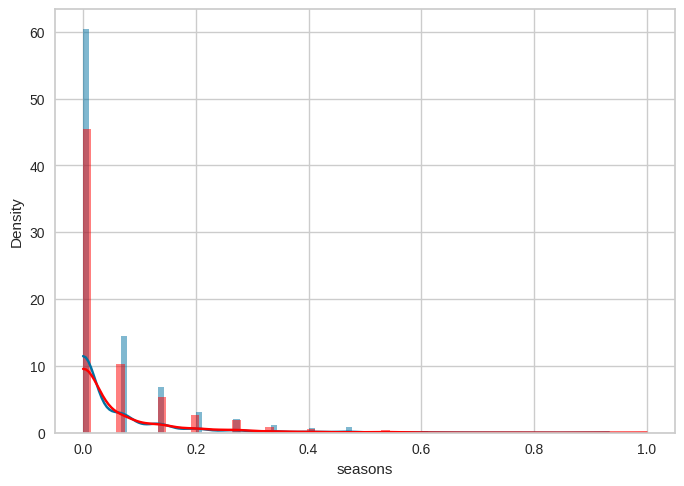

In [269]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Define the features and the target
X = tv_shows_data1.drop('seasons', axis=1)  # Assuming 'seasons' is the target
y = tv_shows_data1['seasons']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Check the distribution of the target in the training set
sns.histplot(y_train, kde=True, stat="density", linewidth=0)

# Check the distribution of the target in the test set
sns.histplot(y_test, kde=True, stat="density", linewidth=0, color='red')

##### What data splitting ratio have you used and why?

- Here we have done **70-30** ratio **split**. **70%** for **train data** and **30%** for **test data**.
- The objective of performing **70-30** ration split is that it **gives better result**.
- It is quite visible from the above graph that the **unseen test data** fits considerably **well** with **respect** to **train data**.
- Hence we can state that **train data has performed well**.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

- In order to cross validate if any imbalanced dataset is present in the current dataset, we will take up few **categorical columns** which are of keen interest and **suspected** to have **imbalanced data**.
- Will then **analyse** the output code to determine the **difference** in majority and minority **class**.
- Though we have **few categorical columns** with **slight difference** in minority and majority **class** but it **is acceptable** as it gives a **generalised output** to analyse.


In [270]:
# Check for imbalanced dataset

print(netflix['type'].value_counts(normalize=True)*100)
print(" ")
print(netflix['director'].value_counts(normalize=True)*100)
print(" ")
print(netflix['country'].value_counts(normalize=True)*100)
print(" ")
print(netflix['rating'].value_counts(normalize=True)*100)
print(" ")
print(netflix['duration'].value_counts(normalize=True)*100)

type
Movie      69.137709
TV Show    30.862291
Name: proportion, dtype: float64
 
director
unknown                  30.579151
raúl campos jan suter     0.231660
marcus raboy              0.205920
jay karas                 0.180180
cathy garciamolina        0.167310
                           ...    
andrew c erin             0.012870
vibhu virender puri       0.012870
lucien jeanbaptiste       0.012870
jason krawczyk            0.012870
sam dunn                  0.012870
Name: proportion, Length: 4047, dtype: float64
 
country
united states                                                   32.767053
india                                                           11.879022
unknown                                                          6.499356
united kingdom                                                   5.096525
japan                                                            2.882883
                                                                  ...    
russia, united states, 

In [274]:
# Handling Imbalanced Dataset (If needed)

We have identified 2 categorical columns with pretty significant difference in minority and majority class dataset i.e., directors and country.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

- We have identified **2 categorical columns** with pretty **significant difference** in minority and majority **class** dataset i.e., **directors** and **country**.
- But **handling** an **imbalanced dataset** is a **crucial consideration**, especially in **classification problem**s where the **distribution of classes** significantly affects the **performance** and **accuracy** of the **models**.
- Here applying some **resampling techniques** like **oversampling** the **minority class** or **undersampling** the **majority class** would significantly **change** the **resultant**.
- Hence we are **moving** forward **without applying** any **resampling techniques**.

## ***7. ML Model Implementation***

### ML Model - 1

In [275]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

lst = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(tv_shows_data1[['release_year', 'seasons']])
    lst.append(km.inertia_)

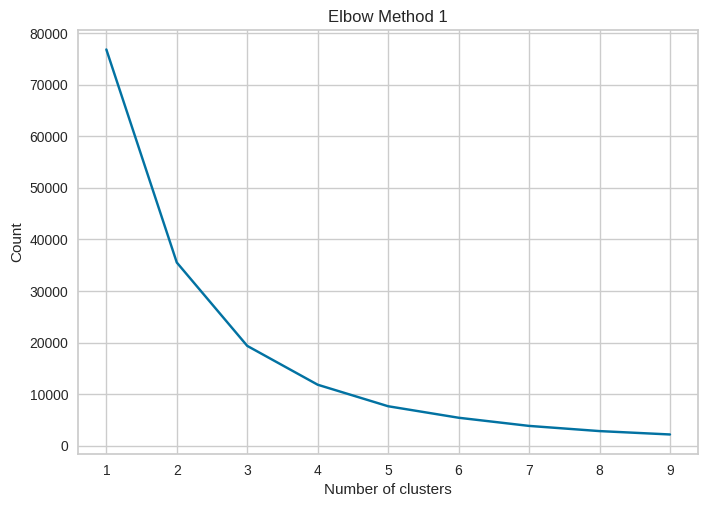

In [276]:
plt.plot(range(1,10), lst)    # Elbow method
plt.title('Elbow Method 1')
plt.xlabel('Number of clusters')
plt.ylabel('Count')
plt.show()

In [277]:
X = tv_shows_data1[['release_year', 'seasons']].values
km = KMeans(n_clusters=2, random_state=42)

ymean = km.fit_predict(X)

In [278]:
# Calculate the silhouette score
score = silhouette_score(X, ymean)

print("Silhouette Score: ", round(score, 2))

Silhouette Score:  0.81


Text(0.5, 1.0, 'K-Means Clustering 1')

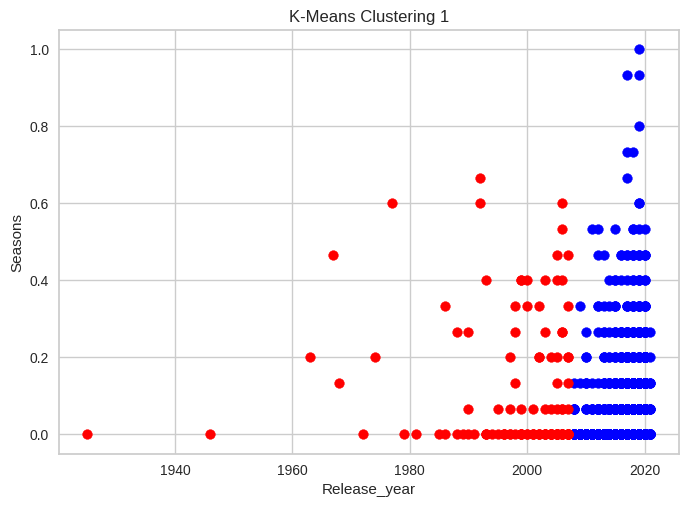

In [279]:
plt.scatter(X[ymean == 0, 0], X[ymean == 0, 1], color="blue")
plt.scatter(X[ymean == 1, 0], X[ymean == 1, 1], color="red")

plt.xlabel('Release_year')
plt.ylabel('Seasons')
plt.title('K-Means Clustering 1')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [280]:
pip install yellowbrick

In [281]:
from yellowbrick.cluster import SilhouetteVisualizer

For n_clusters = 2, silhouette score is 0.8106947711908461


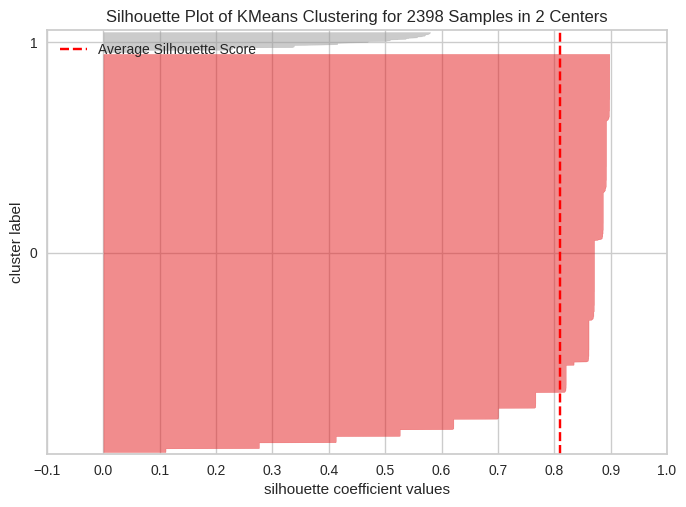

For n_clusters = 3, silhouette score is 0.7060323606457349


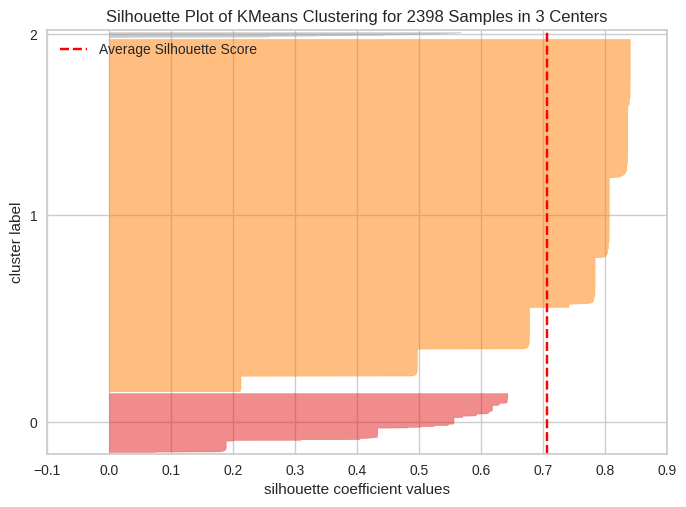

For n_clusters = 4, silhouette score is 0.6447332023773269


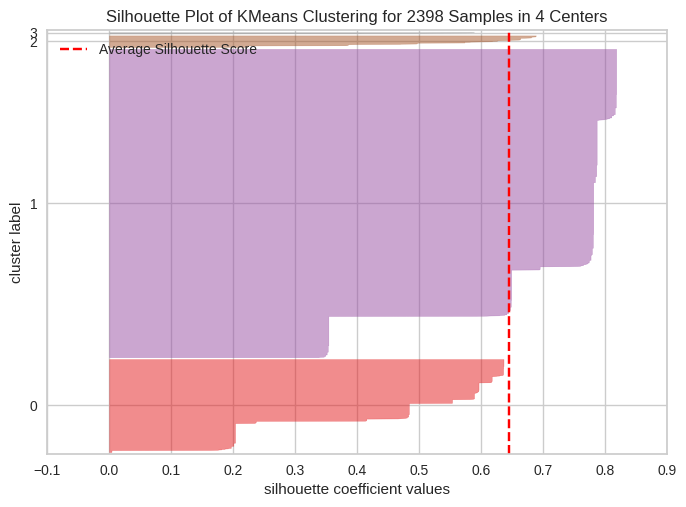

In [282]:
# Visualizing evaluation Metric Score chart

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()

silhouette_analysis(5)

#### 2. Cross- Validation & Hyperparameter Tuning

Silhouette Score for 2 clusters: 0.8106947711908461
Silhouette Score for 3 clusters: 0.707181707677217
Silhouette Score for 4 clusters: 0.6182305191619025
Silhouette Score for 5 clusters: 0.6170298902168246
Silhouette Score for 6 clusters: 0.6182692966891611
Silhouette Score for 7 clusters: 0.6192729019084805
Silhouette Score for 8 clusters: 0.6320554961701093
Silhouette Score for 9 clusters: 0.6337490967916918
Best number of clusters: 2


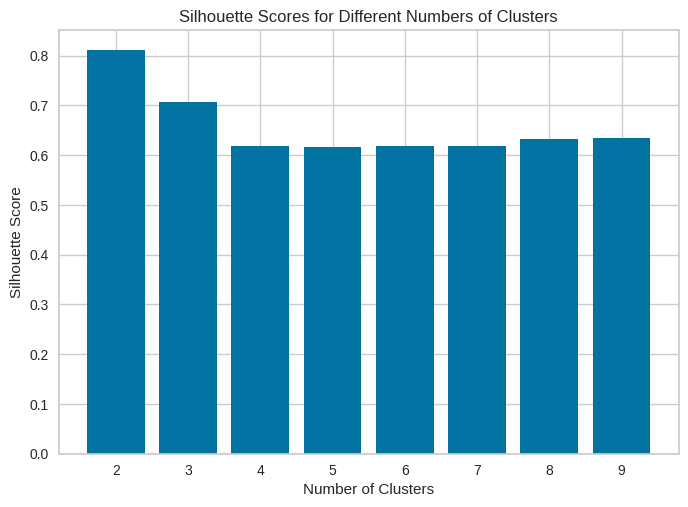

In [283]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Range of `n_clusters` values to try
cluster_range = range(2, 10)

silhouette_scores = {}

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[n_clusters] = score
    print(f"Silhouette Score for {n_clusters} clusters: {score}")

# Best number of clusters based on highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best number of clusters: {best_n_clusters}")

# Plotting the results
plt.figure()
plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

-  For **K-Means**, important **hyperparameters** include the **number of clusters**.
- **GridSearchCV** or **RandomizedSearchCV**, are **generally used** with **supervised learning** models and **aren't directly** applicable to **unsupervised algorithms** like **K-Means** because they require a **scoring function** that **depends** on **labeled data**.
- So, here we are trying to analyse **Silhouette Score** based on different **cluster size** and then extract out the one which gives **best score**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- As of no **improveme**nt can be seen, but above analysis suggests that **year on year** the count of **seasons** is **increasing**, marking the growth of **TV shows**.
- **Silhouette Score** can also be seen showing **decremental results** with **increase in cluster** size from **2 to** 5.
- A **slight improvement** in **Silhouette Score** can been identified while making a transition from **cluster size 5 to 6** but then again a downfall can be visualized.
- While **cluster size 2** gives **best Silhouette Score** of **0.78**.

### ML Model - 2

In [284]:
# We will split duration column to extract numeric values
movie_shows_data1[["min","text"]]  = movie_shows_data1["duration"].str.split(" ", expand=True)
movie_shows_data1["min"] = movie_shows_data1["min"].astype('int')

In [285]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

lst2 = []
for i in range(1, 10):
    km2 = KMeans(n_clusters=i)
    km2.fit(movie_shows_data1[['release_year', 'min']])
    lst2.append(km2.inertia_)

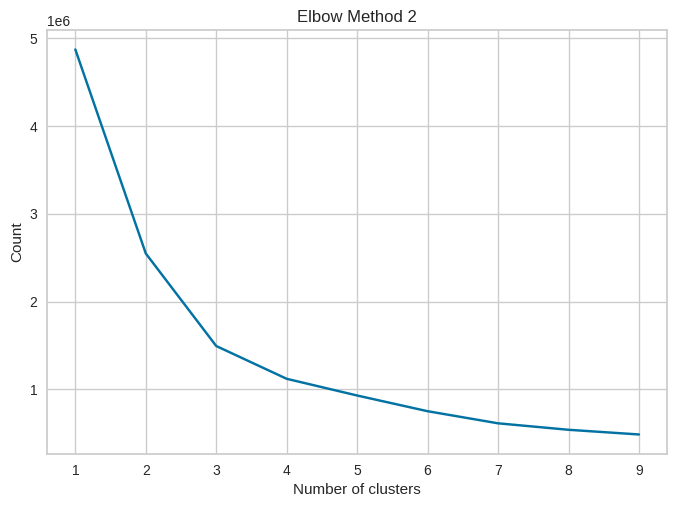

In [286]:
plt.plot(range(1,10), lst2)
plt.title('Elbow Method 2')
plt.xlabel('Number of clusters')
plt.ylabel('Count')
plt.show()

In [287]:
X2 = movie_shows_data1[['release_year', 'min']].values
km2 = KMeans(n_clusters=3, random_state=42)

ymean2 = km2.fit_predict(X2)

In [288]:
# Calculate the silhouette score
score2 = silhouette_score(X2, ymean2)

print("Silhouette Score: ", round(score2, 2))

Silhouette Score:  0.5


Text(0.5, 1.0, 'K-Means Clustering 2')

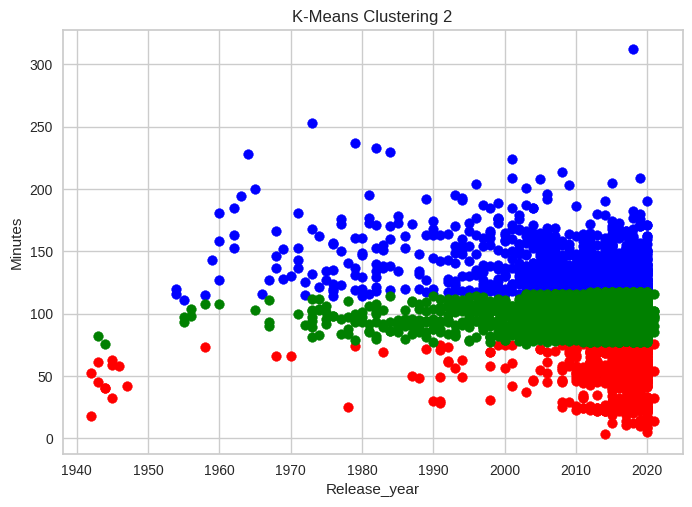

In [289]:
plt.scatter(X2[ymean2 == 0, 0], X2[ymean2 == 0, 1], color="blue")
plt.scatter(X2[ymean2 == 1, 0], X2[ymean2 == 1, 1], color="red")
plt.scatter(X2[ymean2 == 2, 0], X2[ymean2 == 2, 1], color="green")

plt.xlabel('Release_year')
plt.ylabel('Minutes')
plt.title('K-Means Clustering 2')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For n_clusters = 2, silhouette score is 0.4490065687955082


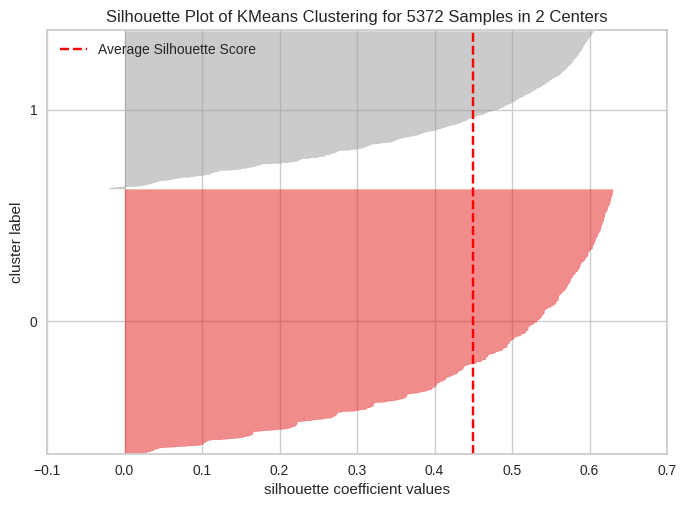

For n_clusters = 3, silhouette score is 0.5014680618574964


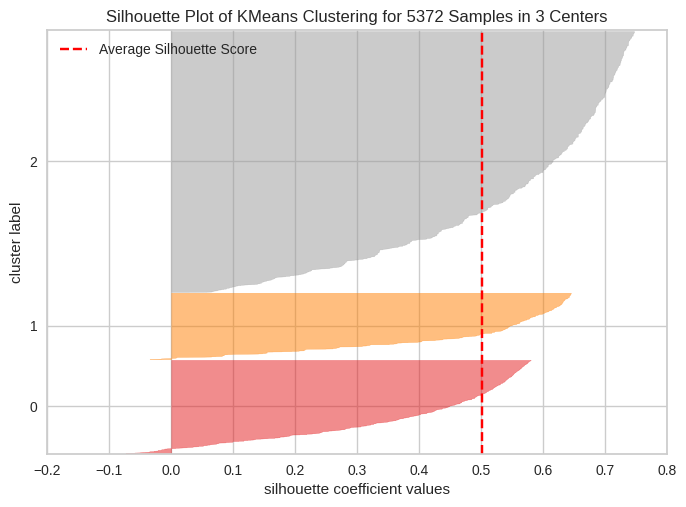

For n_clusters = 4, silhouette score is 0.44450136369528986


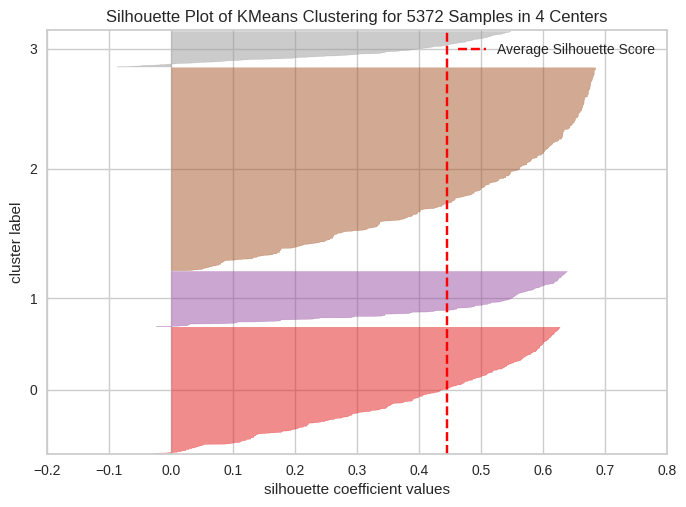

In [290]:
# Visualizing evaluation Metric Score chart

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km2 = KMeans(n_clusters=n_clusters)
    preds = km2.fit_predict(X2)
    centers = km2.cluster_centers_

    score2 = silhouette_score(X2, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score2))

    visualizer = SilhouetteVisualizer(km2)

    visualizer.fit(X2)
    visualizer.poof()

silhouette_analysis(5)

#### 2. Cross- Validation & Hyperparameter Tuning

Silhouette Score for 2 clusters: 0.4490065687955082
Silhouette Score for 3 clusters: 0.5015167819038023
Silhouette Score for 4 clusters: 0.436737884727415
Silhouette Score for 5 clusters: 0.3861571747090927
Silhouette Score for 6 clusters: 0.42219845577409976
Silhouette Score for 7 clusters: 0.43700943027128303
Silhouette Score for 8 clusters: 0.41743315008201054
Silhouette Score for 9 clusters: 0.42781417135830224
Best number of clusters: 3


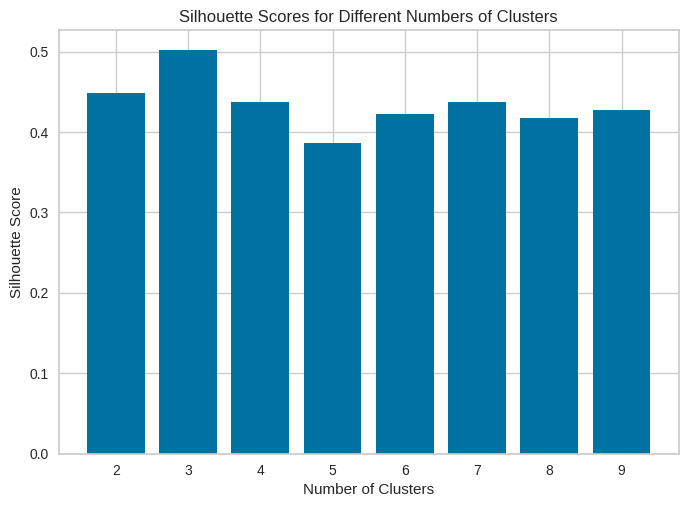

In [291]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

cluster_range2 = range(2, 10)

silhouette_scores2 = {}

for n_clusters in cluster_range2:
    km2 = KMeans(n_clusters=n_clusters, random_state=42)
    labels2 = km2.fit_predict(X2)
    score2 = silhouette_score(X2, labels2)
    silhouette_scores2[n_clusters] = score2
    print(f"Silhouette Score for {n_clusters} clusters: {score2}")

# Best number of clusters based on highest silhouette score
best_n_clusters2 = max(silhouette_scores2, key=silhouette_scores2.get)
print(f"Best number of clusters: {best_n_clusters2}")

# Plotting the results
plt.figure()
plt.bar(silhouette_scores2.keys(), silhouette_scores2.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

-  For **K-Means**, important **hyperparameters** include the **number of clusters**.
- **GridSearchCV** or **RandomizedSearchCV**, are **generally used** with **supervised learning** models and **aren't directly** applicable to **unsupervised algorithms** like **K-Means** because they require a **scoring function** that **depends** on **labeled data**.
- So, here we are trying to analyse **Silhouette Score** based on different **cluster size** and then extract out the one which gives **best score**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- As of no **improvement** can be seen, but above analysis suggests that since year **1960** the **duration** of movies has **gone up**, data points are staggered b/w year **1980-2020** and duration from **10-180 mins**.
- **Silhouette Score** can also be seen showing up and down trend based on cluster size.
- The **cluster size 3** gives **best Silhouette Score** of **0.5**.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- In **unsupervised ML** models **Silhouette Score** plays an **emimenent role** in d**efining the correctness** of the selected **model**.
- Its quite straight forward that **different cluster size** gives different **Silhouette Score** and the one with **best Silhouette Score** is considered the **best cluster size**.
- Though we can interpret the data at different **Silhouette Score** and we would still be able to get some result but best practice is to go with the one which gives **best results**.
- The **cluster size 3** is most suitable as the **datapoints** are easy to **seggregate and analyse**.
- The above model depicts it clearly that with **year passing** on, the **duration** of **movies** is also **transcending**.

### ML Model - 3

In [292]:
# Will perform grouping based on release_year and show_id count
ML3 = netflix.groupby("month_added")["show_id"].count()
ML3

month_added
1     756
2     471
3     668
4     600
5     543
6     542
7     600
8     617
9     618
10    785
11    738
12    832
Name: show_id, dtype: int64

In [293]:
# Convert the Series to a DataFrame
df_ml3 = ML3.reset_index(name='show_count')

In [294]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

lst3 = []

# Loop through different values of k to perform KMeans and store the inertia
for i in range(1, 10):
    km3 = KMeans(n_clusters=i)
    km3.fit(df_ml3[['month_added', 'show_count']])
    lst3.append(km3.inertia_)

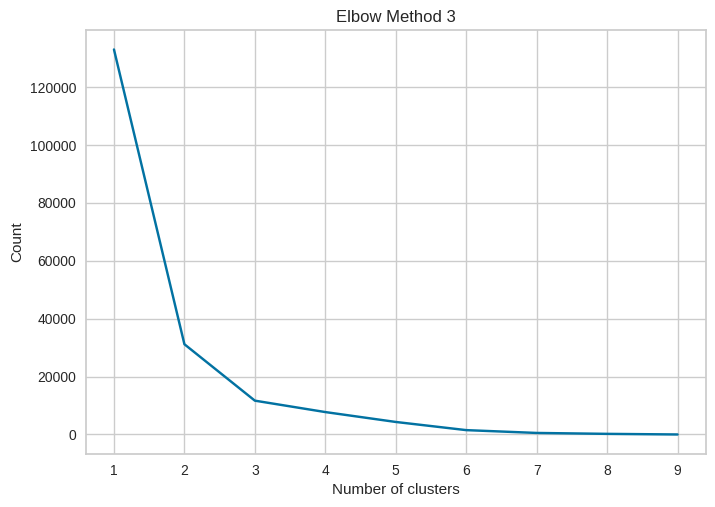

In [296]:
plt.plot(range(1, 10), lst3)
plt.title('Elbow Method 3')
plt.xlabel('Number of clusters')
plt.ylabel('Count')
plt.show()

In [297]:
X3 = df_ml3[['month_added', 'show_count']].values
km3 = KMeans(n_clusters=2, random_state=42)

ymean3 = km3.fit_predict(X3)

In [298]:
# Calculate the silhouette score
score3 = silhouette_score(X3, ymean3)

print("Silhouette Score: ", round(score3, 2))

Silhouette Score:  0.65


Text(0.5, 1.0, 'K-Means Clustering 3')

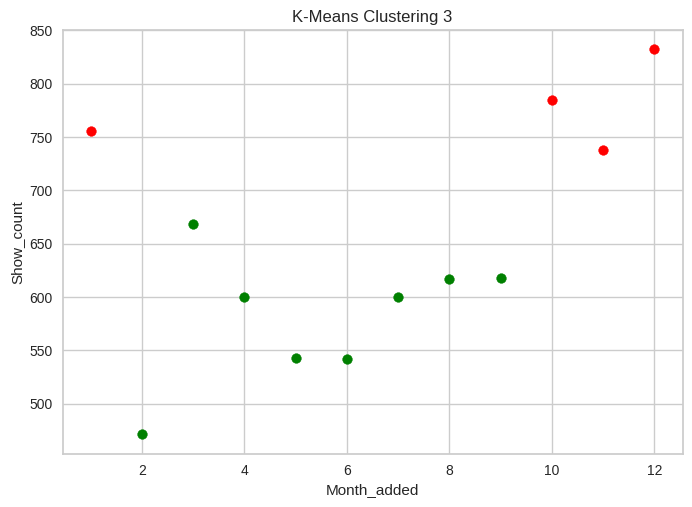

In [299]:
plt.scatter(X3[ymean3 == 0, 0], X3[ymean3 == 0, 1], color="green")
plt.scatter(X3[ymean3 == 1, 0], X3[ymean3 == 1, 1], color="red")

plt.xlabel('Month_added')
plt.ylabel('Show_count')
plt.title('K-Means Clustering 3')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For n_clusters = 2, silhouette score is 0.6496374798435648


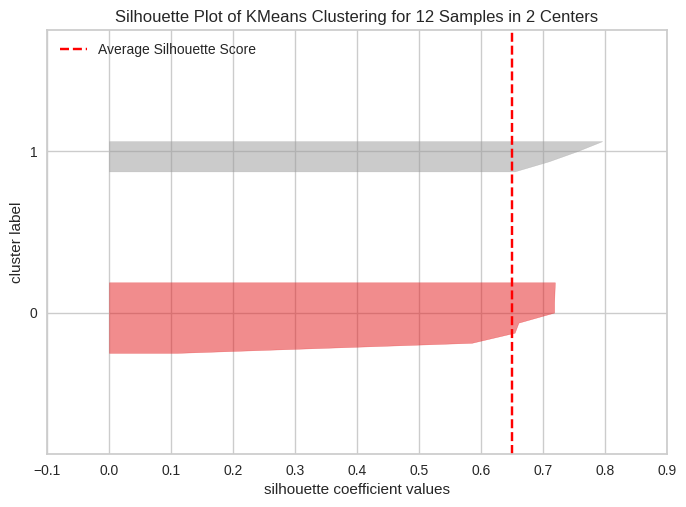

For n_clusters = 3, silhouette score is 0.6316061874702928


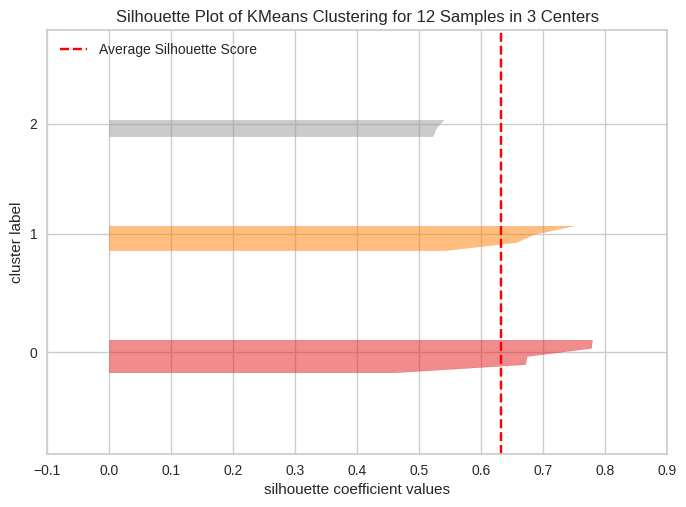

For n_clusters = 4, silhouette score is 0.5272633056981694


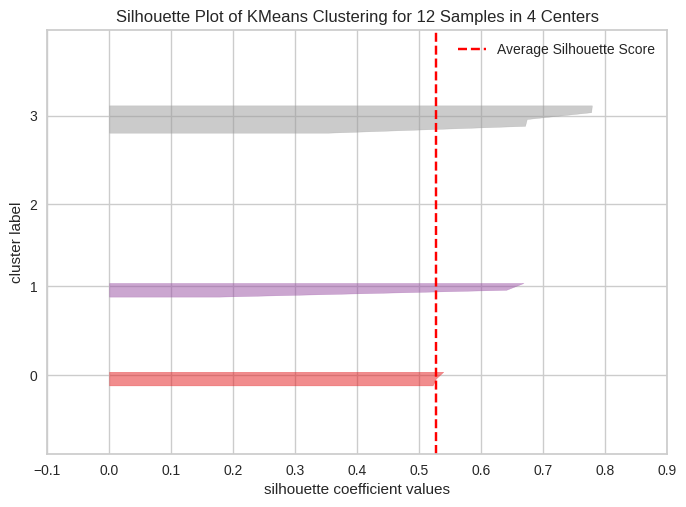

In [300]:
# Visualizing evaluation Metric Score chart

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km3 = KMeans(n_clusters=n_clusters)
    preds = km3.fit_predict(X3)
    centers = km3.cluster_centers_

    score3 = silhouette_score(X3, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score3))

    visualizer = SilhouetteVisualizer(km3)

    visualizer.fit(X3)
    visualizer.poof()

silhouette_analysis(5)

#### 2. Cross- Validation & Hyperparameter Tuning

Silhouette Score for 2 clusters: 0.6496374798435648
Silhouette Score for 3 clusters: 0.6316061874702928
Silhouette Score for 4 clusters: 0.5272633056981694
Silhouette Score for 5 clusters: 0.5239391137336789
Silhouette Score for 6 clusters: 0.5324231811217174
Silhouette Score for 7 clusters: 0.4922374135120056
Silhouette Score for 8 clusters: 0.5282551443035653
Silhouette Score for 9 clusters: 0.4546009636074073
Best number of clusters: 2


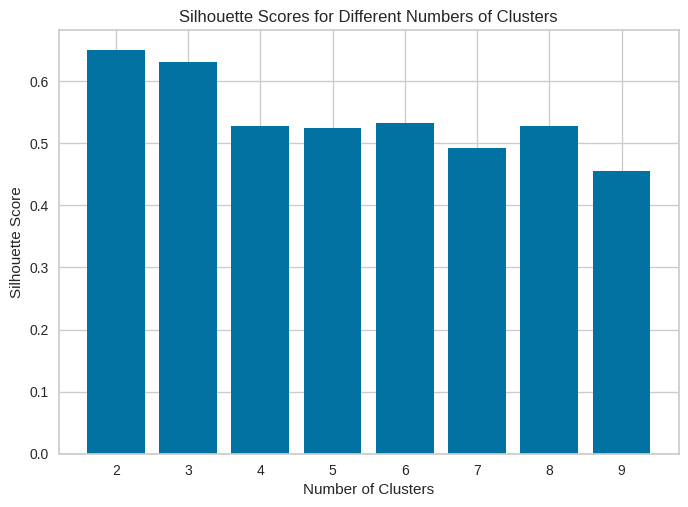

In [301]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

cluster_range3 = range(2, 10)

silhouette_scores3 = {}

for n_clusters in cluster_range3:
    km3 = KMeans(n_clusters=n_clusters, random_state=42)
    labels3 = km3.fit_predict(X3)
    score3 = silhouette_score(X3, labels3)
    silhouette_scores3[n_clusters] = score3
    print(f"Silhouette Score for {n_clusters} clusters: {score3}")

# Best number of clusters based on highest silhouette score
best_n_clusters3 = max(silhouette_scores3, key=silhouette_scores3.get)
print(f"Best number of clusters: {best_n_clusters3}")

# Plotting the results
plt.figure()
plt.bar(silhouette_scores3.keys(), silhouette_scores3.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

-  For **K-Means**, important **hyperparameters** include the **number of clusters**.
- **GridSearchCV** or **RandomizedSearchCV**, are **generally used** with **supervised learning** models and **aren't directly** applicable to **unsupervised algorithms** like **K-Means** because they require a **scoring function** that **depends** on **labeled data**.
- So, here we are trying to analyse **Silhouette Score** based on different **cluster size** and then extract out the one which gives **best score**.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- As of no **improvement** can be seen, but above analysis suggests that overall most of the shows may it be **TV shows** or **movie shows** - **Jan, Oct, Nov and Dec** highlights the **most releases**.
- **Silhouette Score** can also be seen showing up and down trend based on cluster size.
- There is close call b/w **cluster size 2 and 3** but **3** gives **best Silhouette Score** of **0.64**.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- In **unsupervised ML** model where we **lack labeled data** , **Silhouette Score** is **considered** to be the **best evaluation analyser**.
- The **Silhouette Score** measures **how similar** an **object** is to its **own cluster** compared to other clusters.
- The **score** ranges from **-1 to +1**, where a **high value** indicates that the **object** is **well matched** to its **own cluster** and **poorly matched** to **neighboring clusters**.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- In **unsupervised learn**ing we have **limited models** to proceed with like **logistic regression**, **hierarchical Clustering** and **K means clustering**.
-The **best mode**l that **fits our case** is **K means clusteri**ng and that is the one we have applied on our findings.
- **K means clustering** helps to **seggregate** the **data points** based on **similarities** and **clusters** them accordingly, making it visiually understandable.
- In our findings also **K means** clustering have **played** a **significant role** in underlying the **outcomes**.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

- **K-Means** is a **popular clustering algorithm** in **unsupervised** dataset that **partitions** a set of **data points** into a predefined **number of clusters**, where each **data point** belongs to the **cluster** with the **nearest** mean.
- So, in short we can conclude that we have choosen **K means clustering** for our dataset.
- While **K-Means** and similar **unsupervised methods** **lack** the explicit **feature importance** metrics available in supervised learning, **careful analysis** of the cluster centroids and **feature distributions** within clusters can provide **valuable insights**.
- **Tools** like **PCA** for **dimension reduction** or **visualization strategies** can effectively communicate these insights, allowing for a **better understanding** of the **factors driving cluster** formation.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

import pickle

from sklearn.cluster import KMeans

# Example: Training a K-Means model
X3 = df_ml3[['month_added', 'show_count']].values
km3 = KMeans(n_clusters=2, random_state=42)

ymean3 = km3.fit_predict(X3)

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(X3, file)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# Load the model from a file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on the finding we can conclude that:
- We can see a **significant growth** in **show count year on year** whether its **tv show** or **movie show**, with **2020** marking the **most releases**.
- We have also seen that **directors** name is missing for most of the **show titles**.
- **TV-MA** is the **highest rating** with a count of **2861** followed by **1928** of **TV-14**.
- The number of **shows** released on **Netflix** has significantly **increased** after **2010** compared to **before 2010**.
- **International Movies** genre is the **highest** with a count of **2437** followed by **2105** of **dramas**.
- We tried to **seggregate** the **Netflix dataset** based on **show_type** i.e., **movie show** and **tv show** and then analysed it individually to get a better understanding of 2.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***